<center><h1>Singh_Vasundhara_HW4</h1></center>
<br>
<br>

Name: Vasundhara Singh
<br>
Github Username: vasu1406
<br>
USC ID: 7421414643

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

### (a) Obtain Data

Import packages

In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install prettytable

In [3]:
import os
import pandas as pd
import numpy as np
from numpy import mean
import seaborn as sns
from scipy.stats import bootstrap
from sklearn.linear_model import LogisticRegression as logisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from numpy import mean
from collections import Counter
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import statsmodels.api as stats
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

Get the AReM Data Set

In [4]:
def readCSVToDataSet(folder):
    folderPath ='../data/AReM/'+folder+'/'
    listToAdd = [1,2,3]
    if(folder == 'bending1' or folder == 'bending2'):
        listToAdd = [1,2]
    else:
        listToAdd = [1,2,3]
    
#     print(folder)
#     print(listToAdd)
    testList = [f"dataset{x}.csv" for x in listToAdd]
    allfiles = os.listdir(folderPath)
#     print(allfiles)
    trainingData = []
    testData = []
    
    for file in allfiles:
        path = os.path.join(folderPath, file)
#         print(path)
        df = pd.read_csv(path,skiprows=range(0, 4))
#         display(df)
        if file in testList:
            testData.append(df)
        else:
            trainingData.append(df)
            
    return trainingData,testData

### (b) Splitting Data

In [5]:
trainingDataMap = dict()
testDataMap = dict()

folders = ['bending1','bending2','cycling','lying','sitting','standing','walking']
for folder in folders:
    dataSet = readCSVToDataSet(folder)
    trainingDataMap[folder] = dataSet[0]
    testDataMap[folder] = dataSet[1]
    

### (c) Feature Extraction

Analysing the features of temporal data to make predictions and distinguish patterns constitutes of Time Series Classification.The commonly used time-domain features in time series classification are Mean, Median, Standard Deviation, Variance,Maximum,Minimum,Range, Interquartile Range,Skewness, Kurtosis, Slope,Correlation Structure, Entropy, Autocorrelation,Lagged correlation, Quartiles, Zero-crossing rate, Root Mean Square etc.


In [6]:
col = ['min1','max1','mean1','median1','std1','1st quart1','3rd quart1',
       'min2','max2','mean2','median2','std2','1st quart2','3rd quart2',
       'min3','max3','mean3','median3','std3','1st quart3','3rd quart3',
       'min4','max4','mean4','median4','std4','1st quart4','3rd quart4',
       'min5','max5','mean5','median5','std5','1st quart5','3rd quart5',
       'min6','max6','mean6','median6','std6','1st quart6','3rd quart6',
      'isBendingColumn']

def timeFeaturesColumns(data):
    timeFeaturesData = []
    for folder in data:
        for dataSet in data[folder]:
#             timeFeaturesData.append(timeFeaturesColumns(dataSet,folder))
        #     Removing the column header
            dataSetPrevious = dataSet.columns[1:]
            dataSetNumeric = dataSet.select_dtypes(include=[np.number])    
    
            timeFeatureValues = []
            for column in dataSetPrevious:
                timeFeatureValues.append(dataSetNumeric.min()[column])
                timeFeatureValues.append(dataSetNumeric.max()[column])
                timeFeatureValues.append(dataSetNumeric.mean()[column])
                timeFeatureValues.append(dataSetNumeric.median()[column])
                timeFeatureValues.append(dataSetNumeric.std()[column])
                timeFeatureValues.append(dataSetNumeric.quantile(0.25)[column])
                timeFeatureValues.append(dataSetNumeric.quantile(0.75)[column])
            if(folder == 'bending1' or  folder == 'bending2'):
                timeFeatureValues.append(1)
            else:
                timeFeatureValues.append(0)
                
            timeFeaturesData.append(timeFeatureValues)
    
#             print(timeFeaturesData)
    return pd.DataFrame(timeFeaturesData,columns = col)

In [7]:
trainingDataframe = timeFeaturesColumns(trainingDataMap)
testDataframe = timeFeaturesColumns(testDataMap)
finalDataFrame = pd.concat([trainingDataframe,testDataframe]).reset_index(drop=True)
# finalDataFrame
finalDataFrame.iloc[:,:-1]

min1   max1      mean1  median1      std1  1st quart1  3rd quart1  min2  \
0   35.00  47.40  43.954500   44.330  1.558835       43.00     45.0000   0.0   
1   33.00  47.75  42.179813   43.500  3.670666       39.15     45.0000   0.0   
2   33.00  45.75  41.678063   41.750  2.243490       41.33     42.7500   0.0   
3   37.00  48.00  43.454958   43.250  1.386098       42.50     45.0000   0.0   
4   36.25  48.00  43.969125   44.500  1.618364       43.31     44.6700   0.0   
..    ...    ...        ...      ...       ...         ...         ...   ...   
83  35.50  46.25  43.174938   43.670  1.989052       42.50     44.5000   0.0   
84  32.75  47.00  42.760563   44.500  3.398919       41.33     45.3725   0.0   
85  19.33  43.50  34.227771   35.500  4.889576       30.50     37.7500   0.0   
86  12.50  45.00  33.509729   34.125  4.850923       30.50     36.7500   0.0   
87  15.00  46.75  34.660583   35.000  5.315110       31.00     38.2500   0.0   

     max2     mean2  ...      std5  1st quart5  3rd quart5  min6  max6  \
0    1.70  0.426250  ...  1.999604     35.3625      36.500   0.0  1.79   
1    3.00  0.696042  ...  3.849448     30.4575      36.330   0.0  2.18   
2    2.83  0.535979  ...  2.411026     28.4575      31.250   0.0  1.79   
3    1.58  0.378083  ...  2.488862     22.2500      24.000   0.0  5.26   
4    1.50  0.413125  ...  3.318301     20.5000      23.750   0.0  2.96   
..    ...       ...  ...       ...         ...         ...   ...   ...   
83   2.12  0.506583  ...  2.983976     12.7500      16.500   0.0  5.72   
84   3.34  0.486167  ...  4.296574     13.0000      18.565   0.0  5.73   
85  14.50  3.995729  ...  3.092094     14.7500      18.670   0.0  9.74   
86  13.05  4.450771  ...  3.133564     14.6275      18.750   0.0  8.96   
87  13.44  4.200896  ...  3.155015     14.2500      18.500   0.0  8.99   

       mean6  median6      std6  1st quart6  3rd quart6  
0   0.493292    0.430  0.513506       0.000       0.940  
1   0.613521    0.500  0.524317       0.000       1.000  
2   0.383292    0.430  0.389164       0.000       0.500  
3   0.679646    0.500  0.622534       0.430       0.870  
4   0.555313    0.490  0.487826       0.000       0.830  
..       ...      ...       ...         ...         ...  
83  0.911979    0.830  0.666161       0.470       1.220  
84  0.842271    0.710  0.722165       0.430       1.090  
85  3.394125    3.100  1.792090       2.105       4.425  
86  3.378479    3.085  1.787360       2.060       4.440  
87  3.244396    3.000  1.630983       2.120       4.240  

[88 rows x 42 columns]

In [8]:
standard_deviation = finalDataFrame.std()
standard_deviation[:-1]

min1          9.569975
max1          4.394362
mean1         5.335718
median1       5.440054
std1          1.772153
1st quart1    6.153590
3rd quart1    5.138925
min2          0.000000
max2          5.062729
mean2         1.574164
median2       1.412244
std2          0.884105
1st quart2    0.946386
3rd quart2    2.125266
min3          2.956462
max3          4.875137
mean3         4.008380
median3       4.036396
std3          0.946710
1st quart3    4.220658
3rd quart3    4.171628
min4          0.000000
max4          2.183625
mean4         1.166114
median4       1.145586
std4          0.458242
1st quart4    0.843620
3rd quart4    1.552504
min5          6.124001
max5          5.741238
mean5         5.675593
median5       5.813782
std5          1.024898
1st quart5    6.096465
3rd quart5    5.531720
min6          0.045838
max6          2.518921
mean6         1.154812
median6       1.086474
std6          0.517617
1st quart6    0.758584
3rd quart6    1.523599
dtype: float64

In [9]:
confidenceInterval = dict()
for col in finalDataFrame.columns[:-1]:
    cf = bootstrap((finalDataFrame[col],), np.std, confidence_level=0.90,
                         random_state=1, method='percentile').confidence_interval
    confidenceInterval[col] = cf

confidenceInterval

{'min1': ConfidenceInterval(low=8.220030583677477, high=10.709495603487852),
 'max1': ConfidenceInterval(low=3.314995620842594, high=5.2855270712546805),
 'mean1': ConfidenceInterval(low=4.68118629427501, high=5.849899034669991),
 'median1': ConfidenceInterval(low=4.76602008649444, high=5.967149662012756),
 'std1': ConfidenceInterval(low=1.5630191079436122, high=1.9370584655327387),
 '1st quart1': ConfidenceInterval(low=5.5435084266101775, high=6.603828876321537),
 '3rd quart1': ConfidenceInterval(low=4.307611950806717, high=5.807620045905693),
 'min2': ConfidenceInterval(low=0.0, high=0.0),
 'max2': ConfidenceInterval(low=4.606956668619025, high=5.371280286178949),
 'mean2': ConfidenceInterval(low=1.3898556652290928, high=1.6960694764705273),
 'median2': ConfidenceInterval(low=1.2324907822015692, high=1.535499793042144),
 'std2': ConfidenceInterval(low=0.7988282897194028, high=0.9370162792471377),
 '1st quart2': ConfidenceInterval(low=0.8263288170602067, high=1.030598676218863),
 '3rd

In [10]:
classifier = logisticRegression(random_state = 42, max_iter=1000).fit(finalDataFrame.iloc[:,:-1], finalDataFrame['isBendingColumn'])
coefficients = classifier.coef_
# print(coefficients)

coeff_dict = dict(zip(finalDataFrame.columns[:-1], coefficients[0]))
coeff_dict

featuresCount = 6
minSum = 0
maxSum = 0
meanSum = 0 
medianSum = 0
stdSum = 0
firstQuartileSum = 0
thirdQuartileSum = 0

for k,v in coeff_dict.items():
    if(k == 'min1' or k == 'min2' or k == 'min3' or k == 'min4' or k == 'min5' or k == 'min6'):
        minSum += abs(v)
    elif (k == 'max1' or k == 'max2' or k == 'max3' or k == 'max4' or k == 'max5' or k == 'max6'):
        maxSum += abs(v)
    elif (k == 'mean1' or k == 'mean2' or k == 'mean3' or k == 'mean4' or k == 'mean5' or k == 'mean6'):
        meanSum += abs(v)
    elif (k == 'median1' or k == 'median2' or k == 'median3' or k == 'median4' or k == 'median5' or k == 'median6'):
        medianSum += abs(v)
    elif(k == 'std1' or k == 'std2' or k == 'std3' or k == 'std4' or k == 'std5' or k == 'std6'):
        stdSum += abs(v)
    elif(k == '1st quart1' or k == '1st quart2' or k == '1st quart3' or k == '1st quart4' or k == '1st quart5' or k == '1st quart6'):
        firstQuartileSum += abs(v)
    else:
        thirdQuartileSum += abs(v)
        

print('min_avg : ',(minSum/featuresCount))
print('max_avg : ',(maxSum/featuresCount))
print('mean_avg : ',(meanSum/featuresCount))
print('median_avg : ',(medianSum/featuresCount))
print('standardDeviation_avg : ',(stdSum/featuresCount))
print('firstQuartile_avg : ',(firstQuartileSum/featuresCount))
print('thirdQuartile_avg : ',(thirdQuartileSum/featuresCount))

min_avg :  0.10137056255594719
max_avg :  0.19634376032101034
mean_avg :  0.10833168743376688
median_avg :  0.08695851306737325
standardDeviation_avg :  0.028390269193569295
firstQuartile_avg :  0.07585152017740815
thirdQuartile_avg :  0.1435763978737987


I fitted a Logisitic Regression model to all the time-domain features and the target variable/class = Bending(isBendingColumn = 1)  or not Bending (isBendingColumn = 0). The averaged printed above are the averages of all the coefficients of the time-domain features. And as we can see the time-domain features **Max, 3rd Quartile and Mean** have the highest average. Hence these seem to be the most important time domain features.

## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

In [11]:
# columnsPart2 = ['isBendingColumn','mean1','median1','std1','mean2','median2','std2','mean6','median6','std6']

# if it is bending1 or bending2 isBendingColumn =1 else 0
columnsPart2 = ['isBendingColumn','max1','mean1','3rd quart1','max2','mean2','3rd quart2','max6','mean6','3rd quart6']
newTrainingDataFrame = trainingDataframe.loc[:, columnsPart2].copy()
newTrainingDataFrame

isBendingColumn   max1      mean1  3rd quart1   max2     mean2  \
0                 1  47.40  43.954500     45.0000   1.70  0.426250   
1                 1  47.75  42.179813     45.0000   3.00  0.696042   
2                 1  45.75  41.678063     42.7500   2.83  0.535979   
3                 1  48.00  43.454958     45.0000   1.58  0.378083   
4                 1  48.00  43.969125     44.6700   1.50  0.413125   
..              ...    ...        ...         ...    ...       ...   
64                0  46.25  34.763333     38.2500  12.68  4.223792   
65                0  51.00  34.935813     38.0625  12.21  4.115750   
66                0  47.67  34.333042     38.0000  12.48  4.396958   
67                0  45.75  34.599875     38.0000  15.37  4.398833   
68                0  43.67  34.225875     37.2500  17.24  4.354500   

    3rd quart2   max6     mean6  3rd quart6  
0       0.5000   1.79  0.493292      0.9400  
1       1.1200   2.18  0.613521      1.0000  
2       0.7100   1.79  0.383292      0.5000  
3       0.5000   5.26  0.679646      0.8700  
4       0.5000   2.96  0.555313      0.8300  
..         ...    ...       ...         ...  
64      5.7225   9.39  3.288271      4.3050  
65      5.6250  10.21  3.280021      4.5000  
66      5.7450   8.01  3.261583      4.3200  
67      5.7675   8.86  3.289542      4.2600  
68      5.7650   9.42  3.479542      4.5375  

[69 rows x 10 columns]

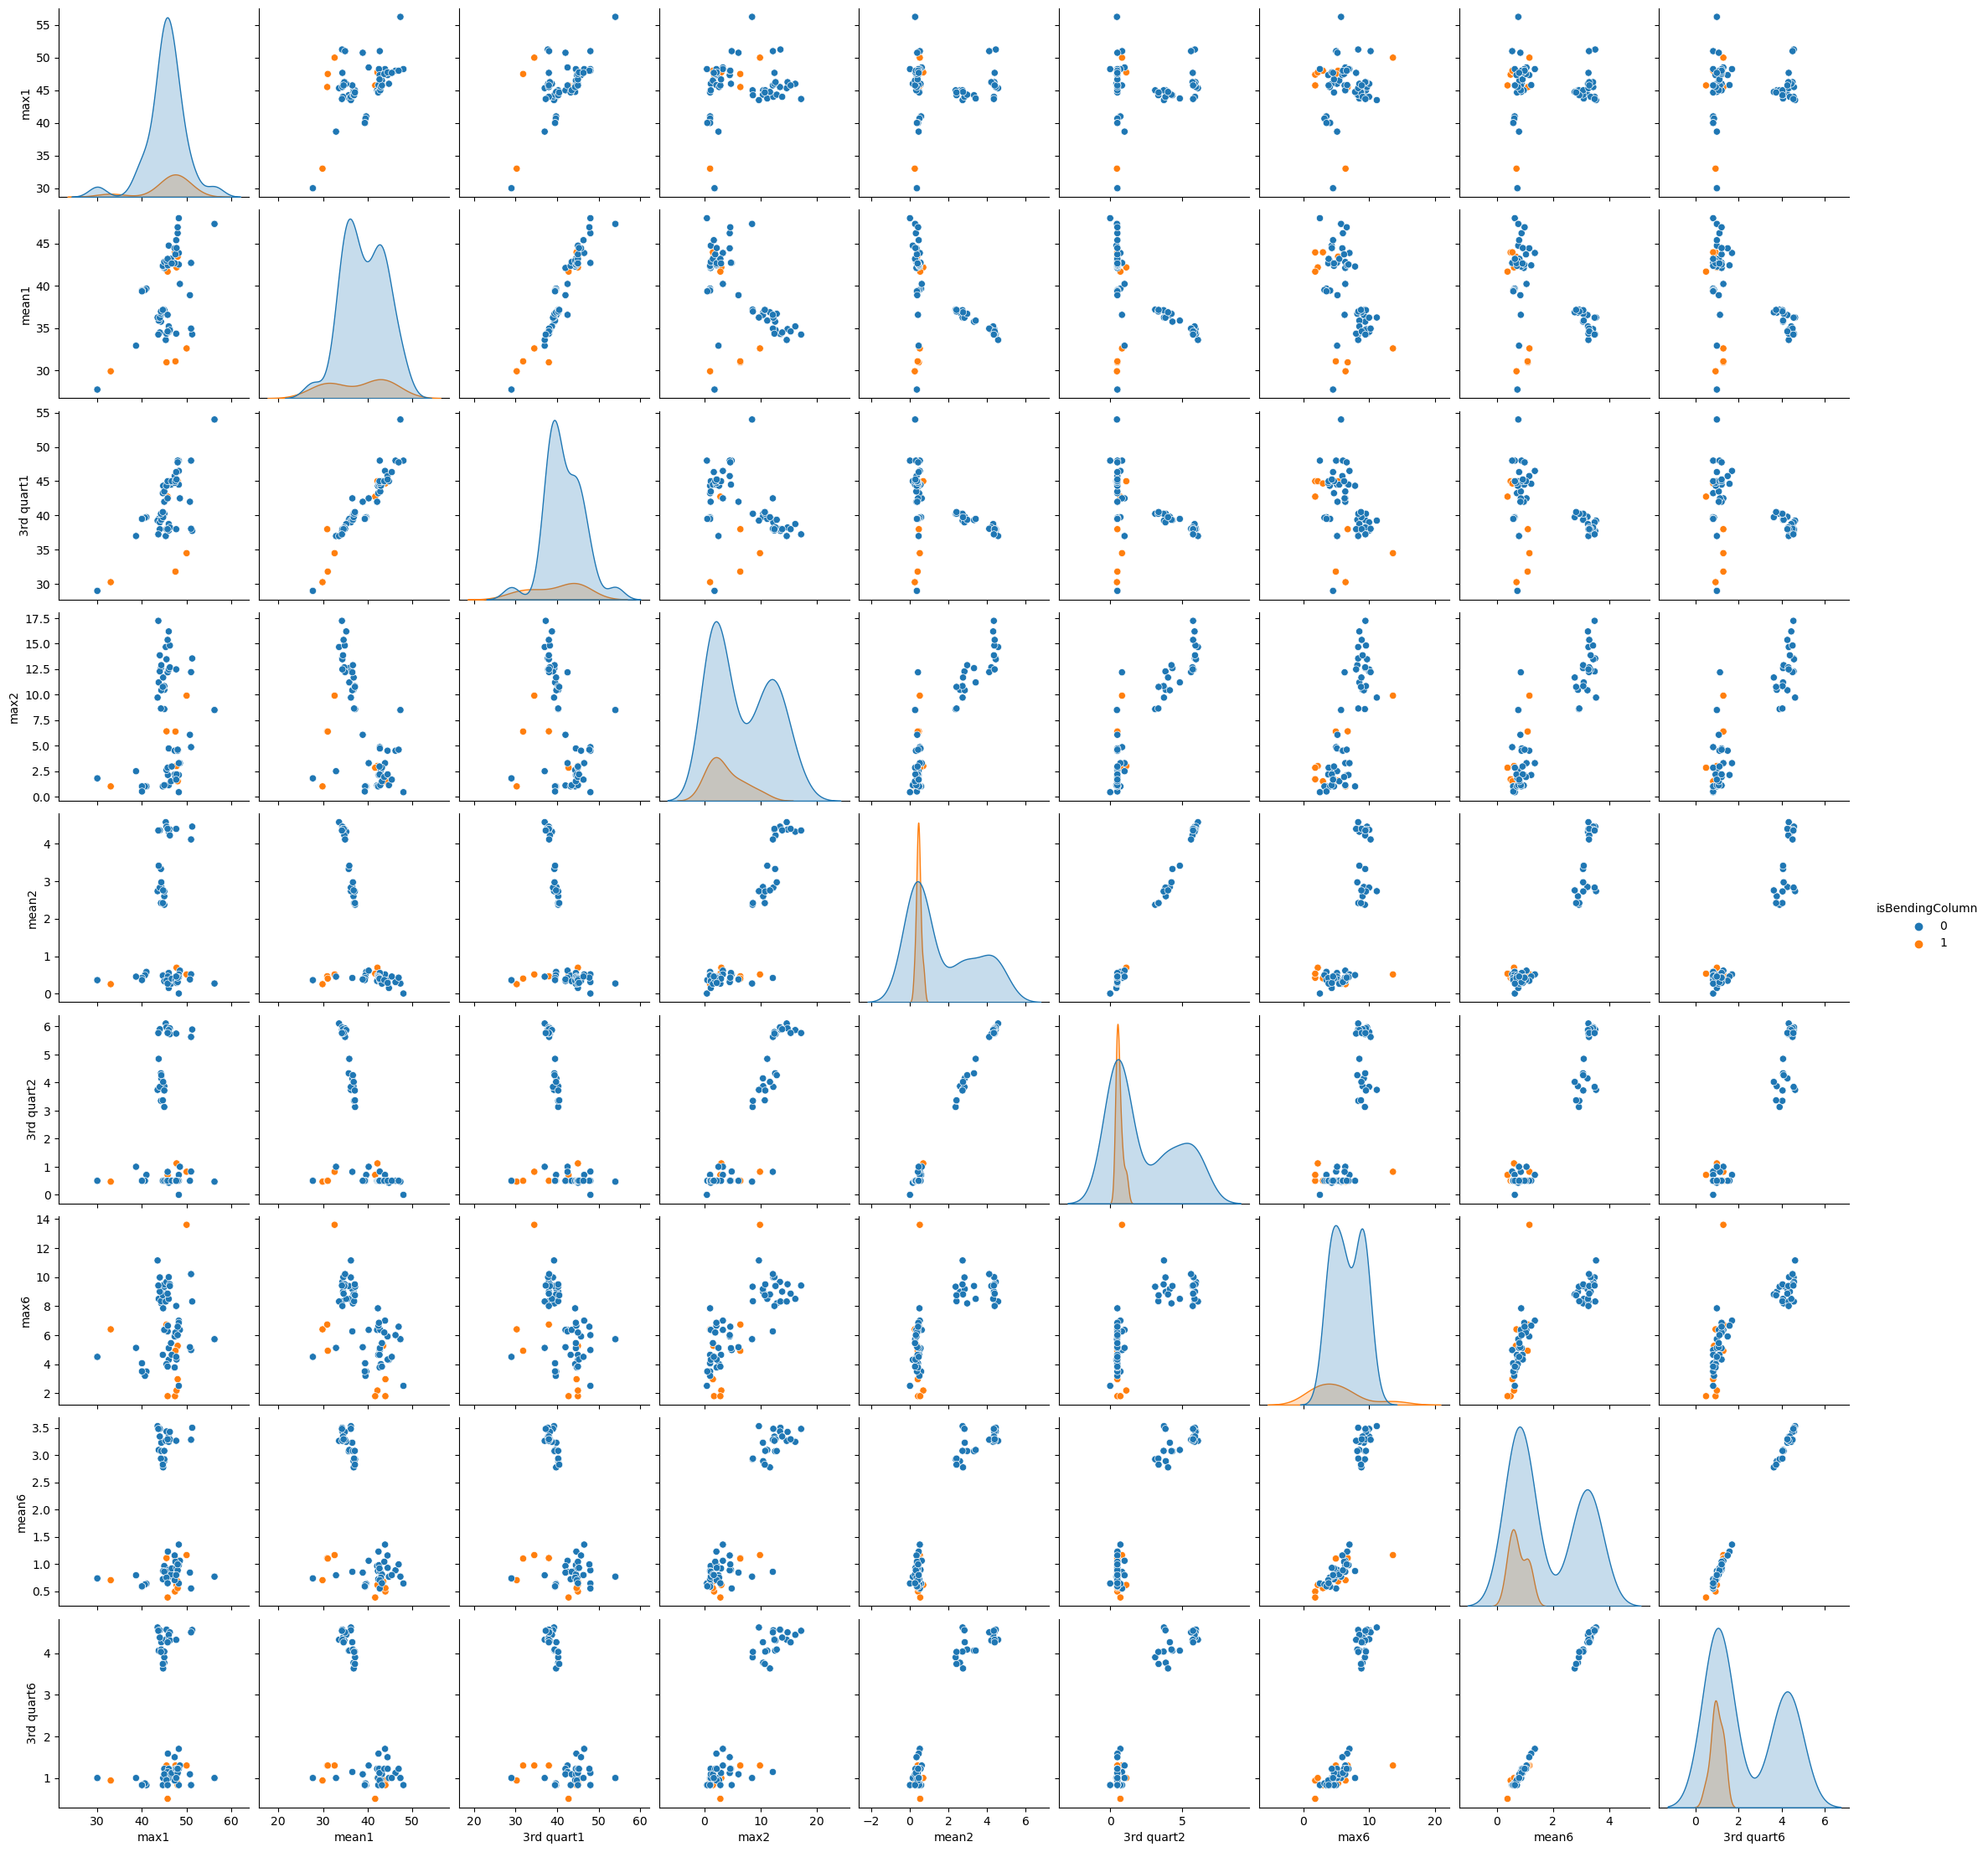

In [12]:
sns.pairplot(data = newTrainingDataFrame[columnsPart2], hue='isBendingColumn')

#### ii. Splitted Plots

In [13]:
newTrainingDataMap = dict()

for key, value in trainingDataMap.items():
    newValue = []
    for v in value:
        df1 = v.head(240)
        df2 = v.iloc[240:]
        df2 = df2.drop(df2.columns[0],axis=1)
        merged_df = pd.concat([df1, df2.add_prefix('new_').reset_index(drop='true')], axis=1)
        newValue.append(merged_df)
#         print(merged_df)
    newTrainingDataMap[key] = newValue
    
# for key in newTrainingDataMap:
#     print(key)
#     display(newTrainingDataMap[key])

In [14]:
# 69 rows
col = ['max1','mean1','3rd quart1',
       'max2','mean2','3rd quart2',
       'max3','mean3','3rd quart3',
       'max4','mean4','3rd quart4',
       'max5','mean5','3rd quart5',
       'max6','mean6','3rd quart6',
       'max7','mean7','3rd quart7',
       'max8','mean8','3rd quart8',
       'max9','mean9','3rd quart9',
       'max10','mean10','3rd quart10',
       'max11','mean11','3rd quart11',
       'max12','mean12','3rd quart12',
       'isBendingColumn']


def timeFeaturesColumnsNew(data):
    timeFeaturesDataNew = []
    for key, values in data.items():
        for value in values:
            dataSetPrevious = value.columns[1:]
            dataSetNumeric = value.select_dtypes(include=[np.number])
            maximum = dataSetNumeric.max()
            mean = dataSetNumeric.mean()
            thirdQuartile = dataSetNumeric.quantile(0.75)
            timeFeatureValuesNew = []
            for column in dataSetPrevious:
                timeFeatureValuesNew.append(maximum[column])
                timeFeatureValuesNew.append(mean[column])
                timeFeatureValuesNew.append(thirdQuartile[column])
            if(key == 'bending1' or  key == 'bending2'):
                timeFeatureValuesNew.append(1)
            else:
                timeFeatureValuesNew.append(0)
#         display(timeFeatureValuesNew)
            timeFeaturesDataNew.append(timeFeatureValuesNew)
    
#     display(timeFeaturesDataNew)
    return pd.DataFrame(timeFeaturesDataNew,columns = col)

In [15]:
splittedTrainingDataframe = timeFeaturesColumnsNew(newTrainingDataMap)
splittedTrainingDataframe
# sns.pairplot(data = splittedTrainingDataframe[col], hue='isBendingColumn')
# plt.show()

max1      mean1  3rd quart1   max2     mean2  3rd quart2   max3  \
0   46.50  44.057167     45.0000   1.50  0.381042      0.5000  29.25   
1   47.75  43.278875     45.2500   3.00  0.673292      1.0000  30.00   
2   45.75  41.621208     44.2500   2.83  0.623083      0.8300  28.25   
3   48.00  44.117042     45.0000   1.30  0.250042      0.5000  27.00   
4   45.00  43.486208     44.5000   1.30  0.378667      0.5000  26.33   
..    ...        ...         ...    ...       ...         ...    ...   
64  46.00  34.966250     38.7500  12.68  4.207958      5.7450  22.00   
65  45.67  34.737042     37.7500  12.21  4.217333      5.7000  22.25   
66  45.00  33.886458     37.5000  12.44  4.332208      5.6425  21.75   
67  44.00  34.836458     38.6900  12.38  4.257750      5.5425  23.50   
68  42.75  34.329333     37.5425  14.50  4.315917      5.5875  23.00   

        mean3  3rd quart3   max4  ...  max10    mean10  3rd quart10  max11  \
0   23.096792     24.0000   2.74  ...   4.44  0.501167       0.7100  38.25   
1   23.141250     24.8125   4.77  ...   5.15  1.171792       1.4800  38.50   
2   19.081458     24.0000   6.42  ...   2.35  0.568667       0.8300  36.00   
3   17.744167     20.0000  10.03  ...   5.21  0.575708       0.8225  26.00   
4   16.397250     18.0000   5.17  ...   3.56  0.669750       0.8875  26.00   
..        ...         ...    ...  ...    ...       ...          ...    ...   
64  15.125750     17.2500   8.04  ...   9.20  3.143167       3.9600  25.25   
65  15.595917     17.6700   8.32  ...   9.09  3.004292       3.7100  25.00   
66  15.158125     17.0000   7.85  ...   9.01  3.146667       4.1825  24.00   
67  15.181958     17.2500   8.07  ...   9.18  3.159583       4.0425  23.00   
68  15.674167     17.6900   9.20  ...   8.84  3.364083       4.4675  24.00   

       mean11  3rd quart11  max12    mean12  3rd quart12  isBendingColumn  
0   34.883375      36.2500   1.50  0.388333       0.7100                1  
1   30.965708      33.7500   2.18  0.586083       0.8700                1  
2   29.635833      30.5625   1.50  0.347500       0.5000                1  
3   22.850875      23.7500   4.06  0.543875       0.7100                1  
4   21.882042      23.5000   2.96  0.585750       0.8300                1  
..        ...          ...    ...       ...          ...              ...  
64  16.168167      18.5000   9.39  3.430208       4.4400                0  
65  16.175167      18.2500  10.21  3.225917       4.3500                0  
66  15.829625      18.2500   8.01  3.274750       4.4375                0  
67  15.996875      18.2500   8.84  3.409458       4.3450                0  
68  16.021917      18.0000   9.12  3.577833       4.7250                0  

[69 rows x 37 columns]

**Both the scatterplots do not have any significant difference between each other. We can spot slight differences in the pairwise plot. But there is no considerable difference.**

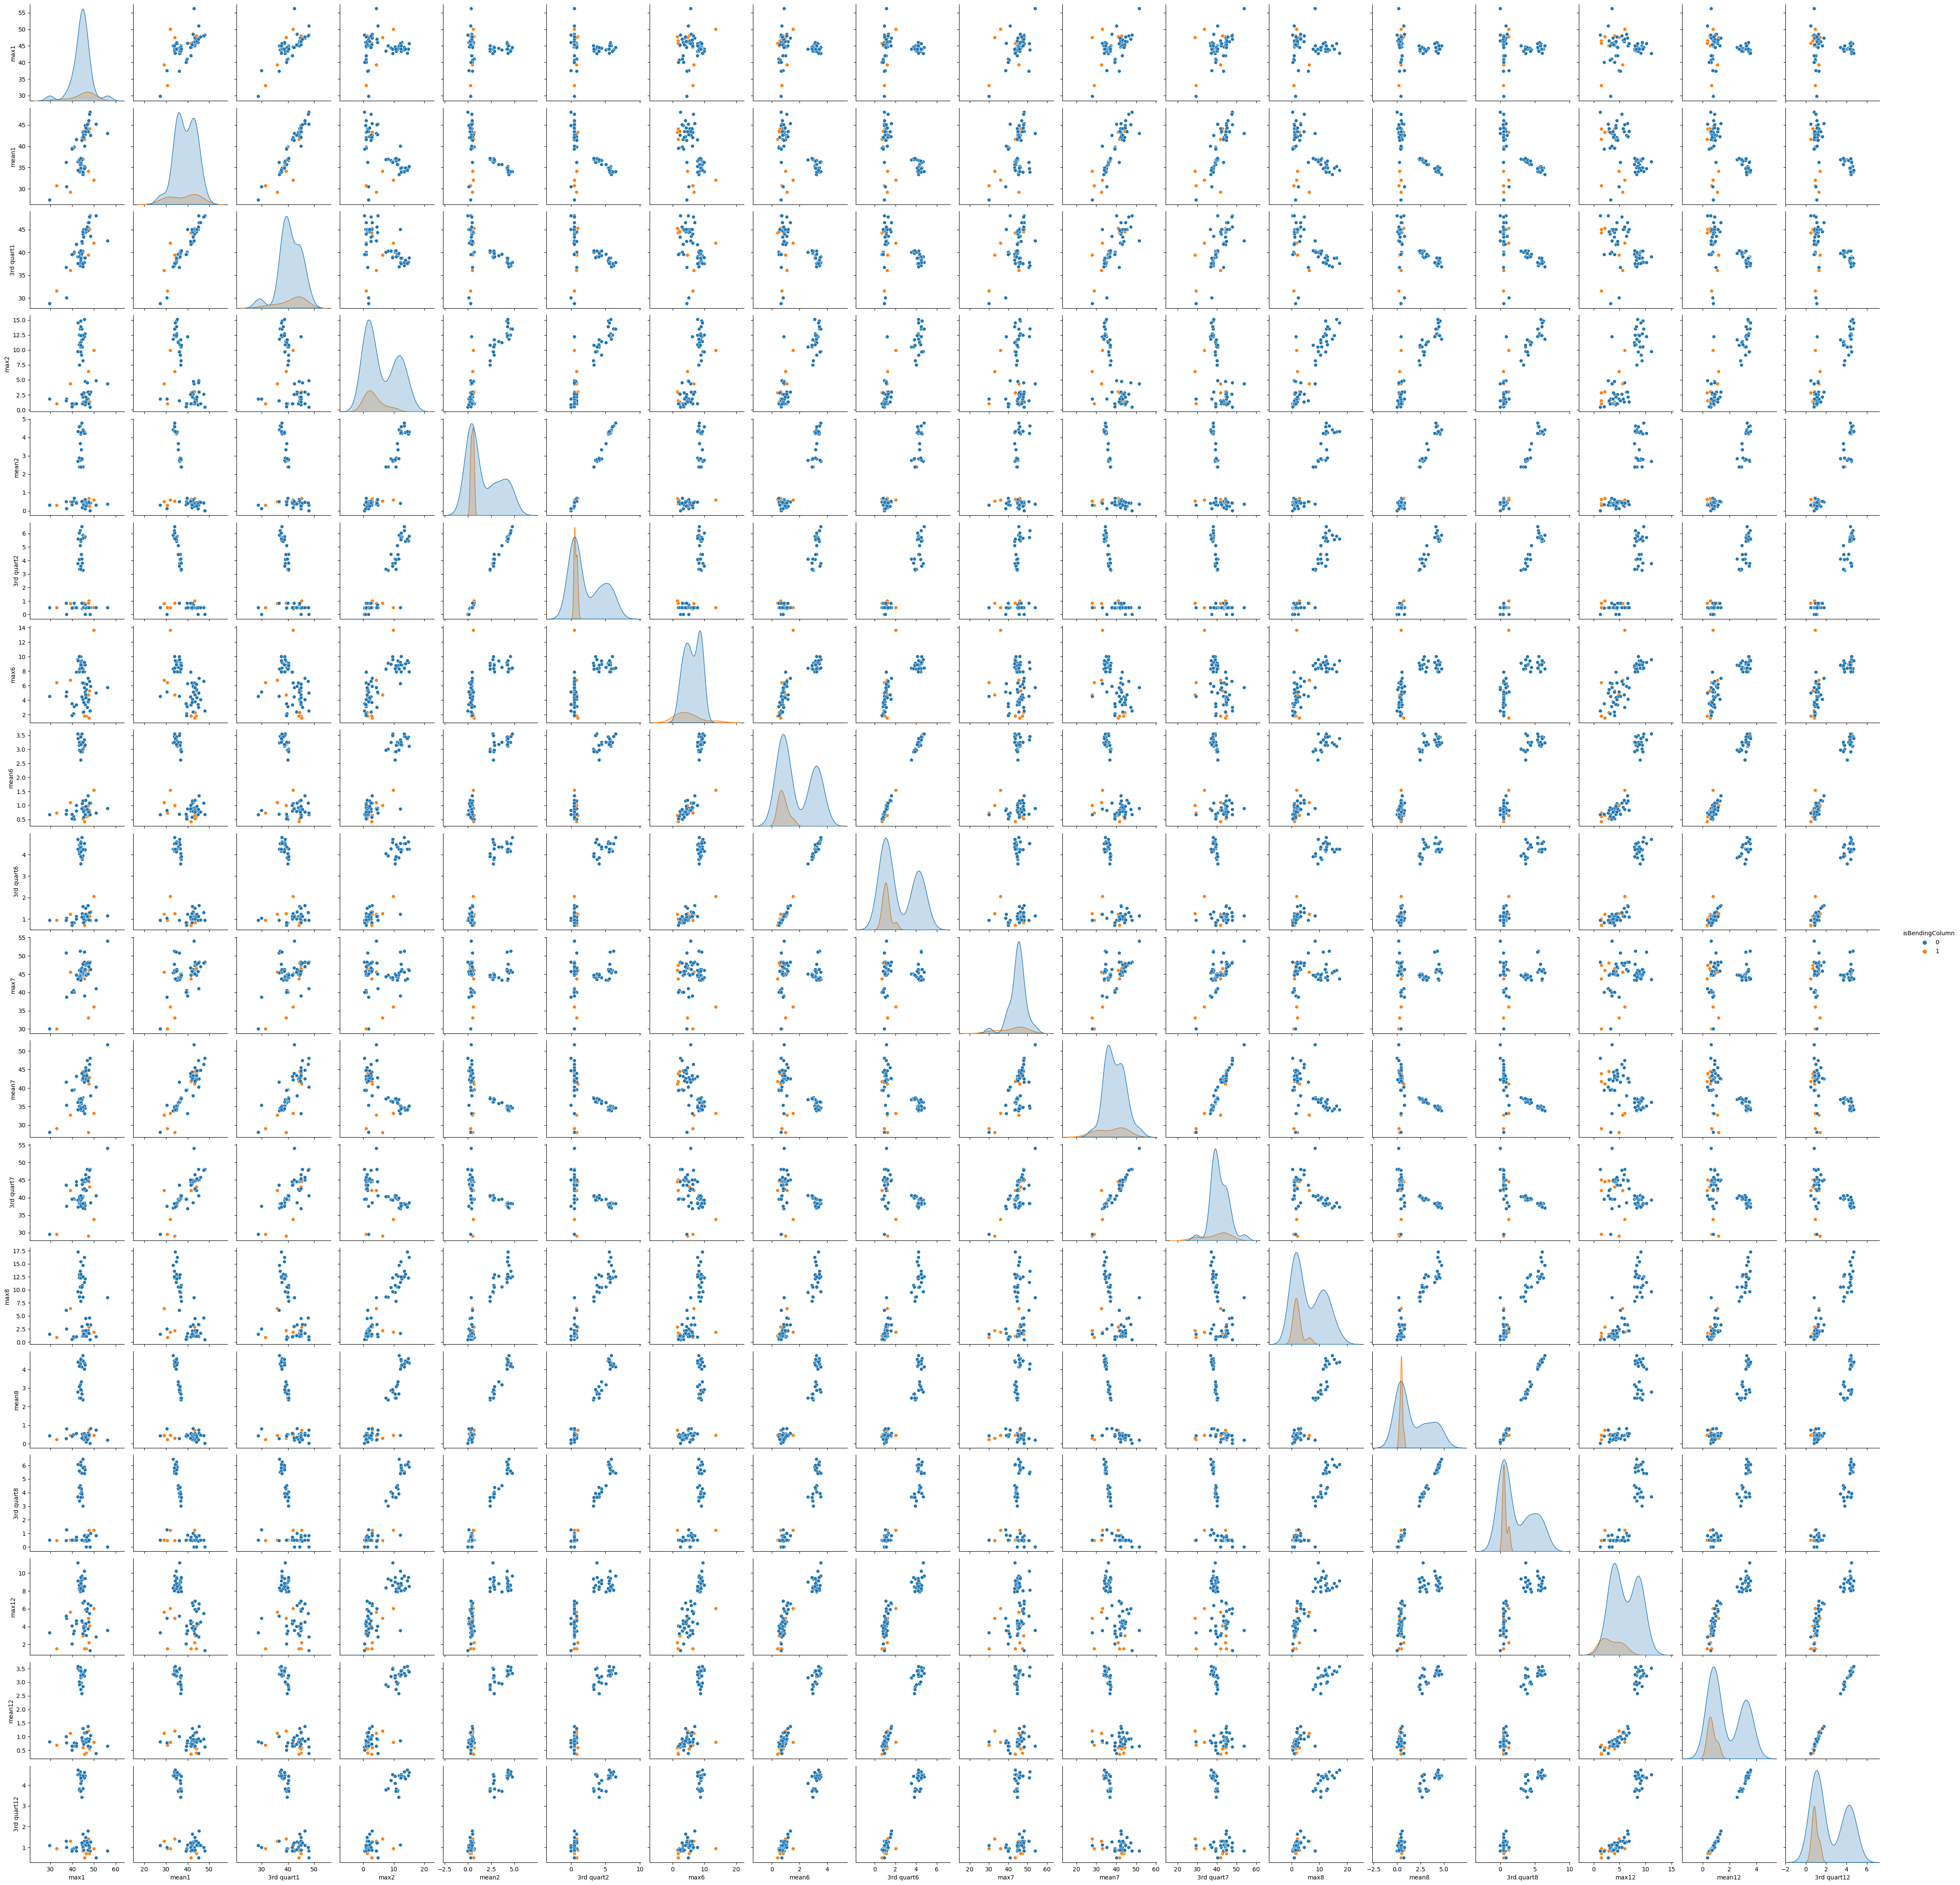

In [16]:

columnsToShow = ['max1','mean1','3rd quart1',
       'max2','mean2','3rd quart2',
       'max6','mean6','3rd quart6',
       'max7','mean7','3rd quart7',
       'max8','mean8','3rd quart8',
       'max12','mean12','3rd quart12',
       'isBendingColumn']

sns.pairplot(data = splittedTrainingDataframe[columnsToShow], hue = 'isBendingColumn')
plt.show()

#### iii. Time Series Segments

The right way to perform Cross Validation would be to perform Cross Validation on the train data, leaving the test data untouched. After looping through the training DataSet for different values of l we get the best features and then we test it against the Test Data. 

The wrong way to perform Cross Validation would be to perform cross validation on the entire dataSet without separating test and train data to get the best features and best l and p. This way the model loses it's ability to generalize as it already knows test data. It would be also wrong to first find the best features and then cross validate only those features for different values of l. We should do exactly the opposite of that. As selecting features and cross validation are both part of training hence it should be done on trainingData.

**RESULTS**
Maximum Accuracy -  0.9714285714285715
Best l -  3
Best p -  6

In [17]:
def get_Column_headers_temp(value):
    existing_columns = value.columns
    column_headers = []
    i=0
    for column in existing_columns:
        column_headers.append(i)
        i = i+1
    return column_headers

In [18]:
def createColumns(value,folder):
    #display(value)
    newColumns = get_Column_headers_temp(value)
    entry = []
    value.columns = newColumns
    for column in value.columns:
        entry.append(value.min()[column])
        entry.append(value.max()[column])
        entry.append(value.mean()[column])
        entry.append(value.std()[column])
        entry.append(value.median()[column])
        entry.append(value.quantile(0.25)[column])
        entry.append(value.quantile(0.75)[column])
    if(folder == 'bending1' or  folder == 'bending2'):
        entry.append(1)
    else:
        entry.append(0)
        
    return entry

In [19]:
def getColumnHeaderNames(timeSeriesNumber,features):
    newColumns = [col1 + col2 for col1 in features for col2 in timeSeriesNumber]
    return newColumns

In [20]:
    
def split_data_features(data,partitionSize):

    finalColumns = getColumnHeaderNames(features = ['min','max','mean','std','median','1st quart','3rd quart'],timeSeriesNumber =[str(x+1) for x in range(0,6*partitionSize)])
    finalColumns.append('isBendingColumn')
    
    newData = []
    for folder in data:
#         print("key",key)
        for value in data[folder]:
#             print(value)
            value = value.drop(columns=value.columns[0]) 
        
            n = len(value)
            partSize = n//partitionSize
            startIndex = 0
            endIndex = partSize
            table = []
            while(endIndex <= n):
                table.append(value.iloc[startIndex:endIndex].reset_index())
                startIndex = endIndex
                endIndex += partSize
            #print(arr)
            newValue = pd.concat(table,axis=1).drop(columns='index')
            newData.append(createColumns(newValue,folder))
    return pd.DataFrame(newData,columns = finalColumns)

In [21]:
best_l_with_max_Accuracy = 1;
def bestLP(smote = None):
    model = logisticRegression(max_iter = 500)
    p_with_Max_Accuracy = 0;
    max_accuracy = 0;
#     all_accuracy = []
#     all_p = []
    for l in range(1,21):
        splittedData = split_data_features(trainingDataMap,l)
#         display(splittedData)
        getColumns = getColumnHeaderNames(features =['max', 'mean', '3rd quart'],timeSeriesNumber =[str(x) for x in range(1, l*6+1)])
        rfecv = RFECV(model, cv = StratifiedKFold(n_splits=5),scoring='accuracy')
    
        features = splittedData[getColumns]
#         print(features)
        isBending = splittedData['isBendingColumn']
        rfecv.fit(features,isBending)
        selectedColumns = []
        
        for i in range(0,len(features.columns)):
            if rfecv.support_[i]:
                selectedColumns.append(features.columns[i])
                
#         if(rfecv.score(features,isBending) > max_accuracy):
            
#             max_accuracy = rfecv.score(features,isBending)
#             best_l_with_max_Accuracy = l
#             p_with_Max_Accuracy = len(selectedColumns)
        
        cv_score = mean(cross_val_score(model,features,isBending,cv = StratifiedKFold(n_splits=5)))
        if(cv_score  > max_accuracy ):
            max_accuracy = cv_score
            best_l_with_max_Accuracy = l
            p_with_Max_Accuracy = len(selectedColumns)
            
        print('**********')
        print('Splitted Into ', l,'equal parts (l =',l,')')
        print('p = ',len(selectedColumns))
#         print('Rfcev Score ', rfecv.score(features,isBending))
        print('CV Score', cv_score)
        print('Selected Columns', selectedColumns)
        print('Imbalance', Counter(isBending))
        print('*************')
    print("*****************************************************")
    print('Maximum Accuracy - ', max_accuracy)
    print('Best l - ', best_l_with_max_Accuracy)
    print('Best p - ', p_with_Max_Accuracy)

In [22]:
bestLP()

**********
Splitted Into  1 equal parts (l = 1 )
p =  4
CV Score 0.9
Selected Columns ['mean4', '3rd quart2', '3rd quart4', '3rd quart6']
Imbalance Counter({0: 60, 1: 9})
*************
**********
Splitted Into  2 equal parts (l = 2 )
p =  4
CV Score 0.9274725274725275
Selected Columns ['max8', 'mean5', 'mean6', 'mean7']
Imbalance Counter({0: 60, 1: 9})
*************
**********
Splitted Into  3 equal parts (l = 3 )
p =  6
CV Score 0.9714285714285715
Selected Columns ['max11', 'max12', 'max13', 'max17', 'mean13', '3rd quart13']
Imbalance Counter({0: 60, 1: 9})
*************
**********
Splitted Into  4 equal parts (l = 4 )
p =  1
CV Score 0.9428571428571428
Selected Columns ['max10']
Imbalance Counter({0: 60, 1: 9})
*************
**********
Splitted Into  5 equal parts (l = 5 )
p =  12
CV Score 0.9417582417582417
Selected Columns ['max1', 'max3', 'max4', 'max5', 'mean2', 'mean12', 'mean26', '3rd quart3', '3rd quart19', '3rd quart21', '3rd quart22', '3rd quart25']
Imbalance Counter({0: 60,

#### iv. Confusion Matrix

The best l and p we got from the above model is l=3 and p=6 with maximum score of 0.9714285714285715. Hence we will be using this for refitting the model with test data. There might be other pairs with same accuracy score as above and I have chosen the pair with the lesser p.

The coefficients and p-values can be found in the display of model.Summary()

Accuracy= 1.0


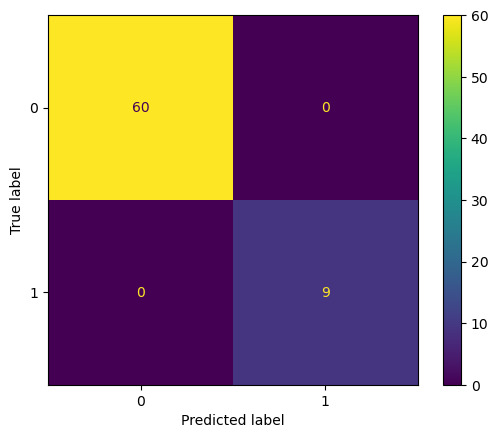

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        isBendingColumn   No. Observations:                   69
Model:                          Logit   Df Residuals:                       62
Method:                           MLE   Df Model:                            6
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                   1.000
Time:                        21:58:06   Log-Likelihood:            -0.00017151
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 9.589e-10
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1116   2706.080  -4.12e-05      1.000   -5303.931    5303.708
max11           1.3128     63.559      0.021      0.984    -123.261     125.887
max12           0.3730     48.313      0.008      0.994     -94.318      95.064
max13           1.0518    163.211      0.006      0.995    -318.836     320.940
max17           1.5102    145.517      0.010      0.992    -283.698     286.718
mean13         -1.7451     59.719     -0.029      0.977    -118.791     115.301
3rd quart13    -1.6942     63.080     -0.027      0.979    -125.329     121.941
===============================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

In [24]:
#Model with best L and P 
# *****************************************************
# Maximum Score -  0.9714285714285715
# Best l -  3
# Best p -  6
# REFIT A LR MODEL USING PRUNED SET OF FEATURES

import warnings

warnings.filterwarnings("ignore")
partitionSize = 3
dataForBestLP = split_data_features(trainingDataMap, partitionSize)
# display(dataForBestLP)

# trainingX = stats.add_constant(dataForBestLP[['max8', 'mean5', 'mean6', 'mean7']])
trainingX = stats.add_constant(dataForBestLP[['max11', 'max12', 'max13', 'max17', 'mean13', '3rd quart13']])
trainingY = dataForBestLP['isBendingColumn']

# print(trainingX,trainingY)

methodUsed = 'lbfgs'
modelNew = stats.Logit(trainingY, trainingX).fit(method = methodUsed)
predictedY = modelNew.predict(trainingX)
finalPredictedY = round(predictedY)
# cv_Score = cross_val_score(modelNew,trainingX,trainingY,cv = StratifiedKFold(n_splits=5))
# cv_scores_list = list(cv_Score)

print('Accuracy=',accuracy_score(trainingY,finalPredictedY))
# print('CV_SCORE=',mean(cv_Score))


matrix = ConfusionMatrixDisplay(confusion_matrix(trainingY,finalPredictedY))
matrix.plot()
plt.show()

modelNew.summary()

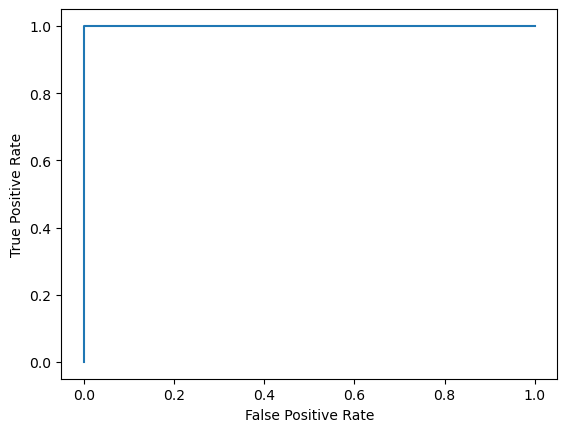

AUC =  1.0


In [25]:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

aucScore = roc_auc_score(trainingY,predictedY)
falsepr, truepr, t = roc_curve(trainingY, predictedY)
plt.plot(falsepr, truepr, label='Logistic Regression AUC = %0.2f' % aucScore)
plt.show()


print('AUC = ',aucScore)

#### v. Test Classifier

The cross-validation score previously achieved was 0.9714285714285715 and the accuracy on Test Set is 1.

Test Accuracy Score -  1.0


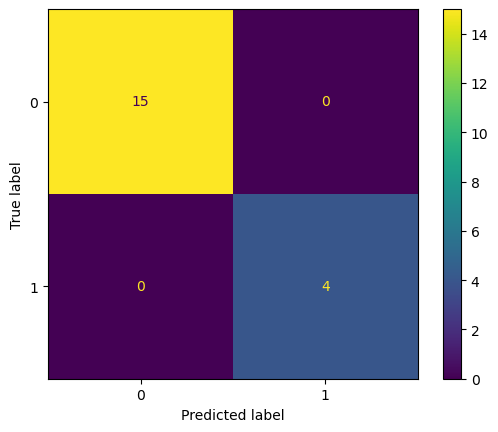

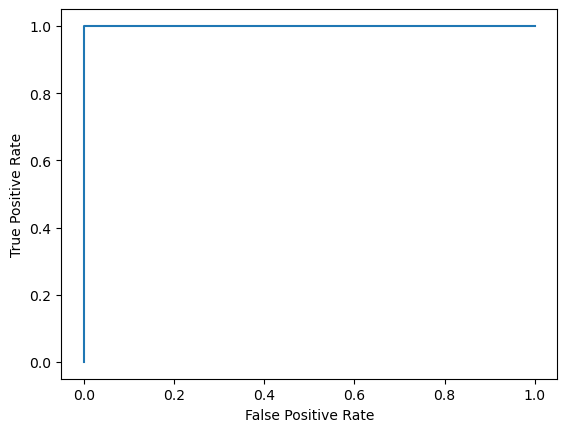

AUC =  1.0


In [26]:
# Best l -  3
# Best p -  6
testDataSplitted = split_data_features(testDataMap,3)
# testX = testDataSplitted[['max8', 'mean5', 'mean6', 'mean7']]
testX = testDataSplitted[['max11', 'max12', 'max13', 'max17', 'mean13', '3rd quart13']]
testY = testDataSplitted['isBendingColumn']

testX = stats.add_constant(testX)
methodUsed = 'lbfgs'
modelNewTest = stats.Logit(testY, testX).fit(method = methodUsed)
predictedYTest = modelNewTest.predict(testX)
accuracy = accuracy_score(testY,round(predictedYTest))
print('Test Accuracy Score - ', accuracy)

matrix = ConfusionMatrixDisplay(confusion_matrix(testY,round(predictedYTest)))
matrix.plot()
plt.show()

modelNewTest.summary()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

aucScore = roc_auc_score(testY,predictedYTest)
falsepr, truepr, t = roc_curve(testY, predictedYTest)
plt.plot(falsepr, truepr, label='Logistic Regression AUC = %0.2f' % aucScore)
plt.show()


print('AUC = ',aucScore)

#### vi. Separation

The bending and non bending classes are well separated from each other which leads to failure of identification of the parameters by iterative approach because of issues in model convergence. Hence this results in instability and issues in parametes estimation of logistic regression. This above warning **"Complete Separation: The results show that there iscomplete separation. In this case the Maximum Likelihood Estimator does not exist and the parameters are not identified."** also suggests the same.

#### vii. Imbalance

Yes we can see imbalanced classes clearly in the above results next to the field "Imbalance Counter". The class ratio of 60 to 9 can be seen in the confusion matrices as well. For logistic regression based on case control sampling smote is being used here with sampling strategy = 1/5. According to PPTs taught in class after the case control ratio of 5 to 1, the variance reduction flattens out hence that is being used as sampling strategy here.

In [27]:
bestLP(SMOTE(sampling_strategy = 0.2,random_state=1))
oversample = SMOTE()

**********
Splitted Into  1 equal parts (l = 1 )
p =  4
CV Score 0.9
Selected Columns ['mean4', '3rd quart2', '3rd quart4', '3rd quart6']
Imbalance Counter({0: 60, 1: 9})
*************
**********
Splitted Into  2 equal parts (l = 2 )
p =  4
CV Score 0.9274725274725275
Selected Columns ['max8', 'mean5', 'mean6', 'mean7']
Imbalance Counter({0: 60, 1: 9})
*************
**********
Splitted Into  3 equal parts (l = 3 )
p =  6
CV Score 0.9714285714285715
Selected Columns ['max11', 'max12', 'max13', 'max17', 'mean13', '3rd quart13']
Imbalance Counter({0: 60, 1: 9})
*************
**********
Splitted Into  4 equal parts (l = 4 )
p =  1
CV Score 0.9428571428571428
Selected Columns ['max10']
Imbalance Counter({0: 60, 1: 9})
*************
**********
Splitted Into  5 equal parts (l = 5 )
p =  12
CV Score 0.9417582417582417
Selected Columns ['max1', 'max3', 'max4', 'max5', 'mean2', 'mean12', 'mean26', '3rd quart3', '3rd quart19', '3rd quart21', '3rd quart22', '3rd quart25']
Imbalance Counter({0: 60,

The results obtained from above
Maximum Score -  0.9714285714285715

Best l =  3
Best p =  6

Training Data


min1   min2       min3      min4    min5     min6     min7  min8   min9  \
0   38.75  46.50  43.945125  1.386745  44.500  42.7500  45.0000  0.00   1.50   
1   35.25  47.75  43.621187  3.348026  45.000  42.6875  45.5000  0.00   3.00   
2   33.00  45.00  40.673812  3.203229  41.500  38.0000  43.2500  0.00   2.18   
3   41.00  48.00  44.792125  0.797137  45.000  45.0000  45.0000  0.00   1.30   
4   40.75  45.00  43.067250  0.997720  42.775  42.0000  43.7500  0.00   1.12   
..    ...    ...        ...       ...     ...      ...      ...   ...    ...   
64  23.00  46.00  35.125312  4.664803  35.375  32.0000  38.8125  0.00  10.61   
65  21.50  45.67  34.284750  4.466491  34.900  31.5000  37.2500  0.00  12.07   
66  18.33  43.33  33.574875  5.237656  33.750  30.3300  37.5000  0.00  11.97   
67  19.33  44.00  35.285000  4.636136  36.000  32.7300  38.8125  0.47  12.38   
68  23.00  42.75  34.270063  4.540007  34.585  31.3100  37.5425  0.00  14.50   

       min10  ...  3rd quart10  3rd quart11  3rd quart12  3rd quart13  \
0   0.350125  ...      36.0000      36.5000         0.00         1.50   
1   0.594750  ...      26.9375      32.5000         0.00         2.18   
2   0.698312  ...      27.0000      30.0000         0.00         1.00   
3   0.177937  ...      22.3300      24.0000         0.00         4.06   
4   0.408750  ...      20.7300      23.0000         0.00         2.96   
..       ...  ...          ...          ...          ...          ...   
64  4.072250  ...      14.1875      18.5625         0.43         9.39   
65  4.211875  ...      14.6700      18.3725         0.00        10.21   
66  4.431875  ...      13.0000      18.0625         0.00         7.46   
67  4.368813  ...      14.0000      18.2500         0.50         8.84   
68  4.180438  ...      14.5000      18.0000         0.43         8.79   

    3rd quart14  3rd quart15  3rd quart16  3rd quart17  3rd quart18  \
0      0.364125     0.445907        0.000       0.0000       0.5000   
1      0.618750     0.501447        0.470       0.4300       0.8700   
2      0.298125     0.263002        0.430       0.0000       0.5000   
3      0.521562     0.530484        0.470       0.0000       0.7100   
4      0.631437     0.515526        0.500       0.4300       0.8700   
..          ...          ...          ...          ...          ...   
64     3.541188     1.687518        3.400       2.4500       4.4400   
65     3.167625     1.635889        3.015       2.0500       4.2100   
66     3.210562     1.659517        3.000       2.0500       4.1500   
67     3.352500     1.684213        3.110       2.1800       4.1500   
68     3.489625     1.727546        3.310       2.3425       4.5725   

    isBendingColumn  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
..              ...  
64                0  
65                0  
66                0  
67                0  
68                0  

[69 rows x 127 columns]

Train Accuracy Score - 1.0


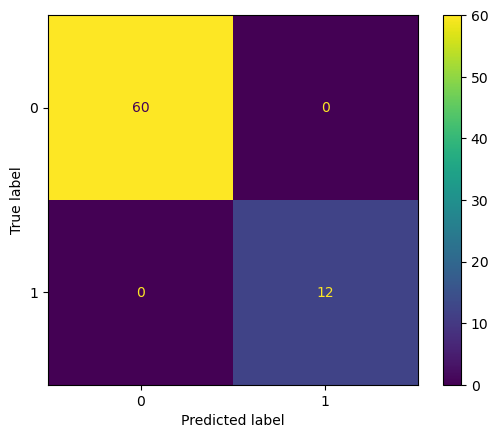

Test Data


min1   min2       min3      min4    min5     min6     min7  min8   min9  \
0   38.75  42.33  41.362563  0.954146  42.000  41.0000  42.0000  0.00   1.22   
1   41.75  44.25  42.921750  0.612032  43.000  42.4575  43.5000  0.00   0.94   
2   12.75  27.00  22.609937  3.095682  23.750  21.0000  24.3300  0.00   6.76   
3   26.50  30.00  28.792875  1.171331  29.250  27.6275  30.0000  0.00   0.94   
4   29.33  44.50  36.794750  3.722530  35.875  34.0000  39.8125  0.00   8.18   
5   29.25  44.00  37.521812  3.055485  37.000  35.2500  39.5425  0.00   8.95   
6   28.50  44.67  38.028875  3.459354  36.750  35.7300  41.3725  0.00  12.99   
7   24.50  29.75  27.788063  1.141923  27.250  27.0000  29.0000  0.00   1.48   
8   24.75  48.25  36.541562  9.006695  30.000  29.0000  48.0000  0.00   3.11   
9   48.00  48.00  48.000000  0.000000  48.000  48.0000  48.0000  0.00   0.00   
10  40.50  44.00  42.312125  0.722343  42.000  42.0000  42.6900  0.00   1.12   
11  37.00  50.75  45.949312  1.643647  45.250  45.0000  48.0000  0.00   4.87   
12  45.00  46.75  45.588875  0.564950  45.500  45.0000  46.0625  0.00   1.00   
13  45.00  47.67  46.242375  0.747074  46.500  45.6275  46.6900  0.00   1.12   
14  35.50  45.00  42.346687  1.916039  42.875  42.2500  43.5000  0.00   2.12   
15  37.00  46.50  44.595250  1.813753  45.000  44.5000  45.5000  0.00   1.73   
16  22.33  42.50  34.561437  4.818041  36.000  30.4750  38.0000  0.00  12.19   
17  18.67  43.00  33.666500  4.816651  34.500  30.3100  37.0000  0.43  12.32   
18  18.33  43.33  33.364562  4.898310  34.000  30.0000  37.0000  0.00  12.00   

       min10  ...  3rd quart10  3rd quart11  3rd quart12  3rd quart13  \
0   0.256125  ...      30.0000      36.0000         0.00         1.87   
1   0.468438  ...      30.0000      33.0000         0.00         2.62   
2   0.871188  ...      19.5000      21.7500         0.00         4.97   
3   0.211625  ...      10.6450      22.0000         0.00         6.76   
4   2.459813  ...      18.0000      21.5000         0.00         9.34   
5   2.156500  ...      18.5850      21.5425         0.00         8.83   
6   2.005125  ...      13.1875      17.8125         0.43         8.50   
7   0.234312  ...       3.0000      10.6900         0.00         3.30   
8   0.291875  ...       1.3300       2.3300         0.00         1.50   
9   0.000000  ...      10.0000      11.2500         0.00         1.30   
10  0.294250  ...      14.0000      18.8125         0.00         5.85   
11  0.213687  ...      16.7500      20.7500         0.00         7.22   
12  0.349562  ...      18.0000      21.0000         0.00         3.49   
13  0.435750  ...       7.6875      12.5000         0.00         3.27   
14  0.543750  ...      15.0000      17.5000         0.00         1.87   
15  0.435312  ...      10.8750      17.0000         0.00         5.73   
16  4.017562  ...      14.6700      18.5000         0.43         8.86   
17  4.547250  ...      15.0000      19.0625         0.00         8.75   
18  4.637000  ...      14.1875      18.5000         0.00         8.26   

    3rd quart14  3rd quart15  3rd quart16  3rd quart17  3rd quart18  \
0      0.508875     0.510427        0.430       0.0000       0.8300   
1      0.402375     0.494225        0.430       0.0000       0.5000   
2      0.834563     0.734751        0.710       0.4700       1.0000   
3      1.715125     1.370512        1.300       0.7100       2.5225   
4      2.757938     1.885510        2.360       1.3000       3.6950   
5      2.668250     1.708308        2.175       1.4100       3.6400   
6      3.578813     1.884558        3.350       2.0600       4.7975   
7      0.779438     0.597059        0.820       0.4700       1.0900   
8      0.434250     0.402082        0.470       0.0000       0.8200   
9      0.671625     0.315375        0.730       0.4700       0.8300   
10     1.123750     1.164361        0.830       0.4300       1.2625   
11     1.157813     1.209829        0.830       0.4300       1.4850   
12     0.588250     

Test Accuracy Score -  1.0


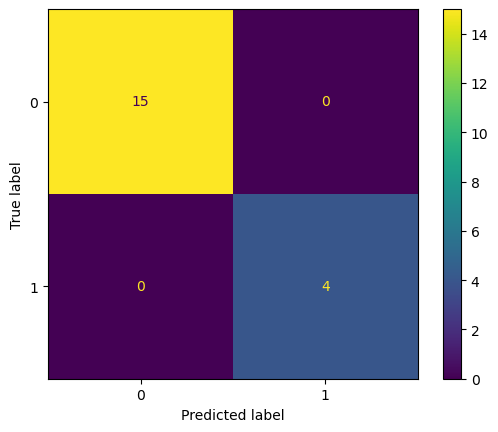

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        isBendingColumn   No. Observations:                   19
Model:                          Logit   Df Residuals:                       12
Method:                           MLE   Df Model:                            6
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                   1.000
Time:                        22:25:45   Log-Likelihood:            -1.7861e-05
converged:                       True   LL-Null:                       -9.7784
Covariance Type:            nonrobust   LLR p-value:                  0.003320
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0414   1.18e+06    3.5e-08      1.000   -2.32e+06    2.32e+06
max11           2.5188   2.46e+04      0.000      1.000   -4.82e+04    4.82e+04
max12           0.9214   8.91e+04   1.03e-05      1.000   -1.75e+05    1.75e+05
max13           1.0939   3.21e+05   3.41e-06      1.000   -6.29e+05    6.29e+05
max17           0.8610   2.89e+05   2.98e-06      1.000   -5.66e+05    5.66e+05
mean13         -2.4983    3.3e+04  -7.56e-05      1.000   -6.47e+04    6.47e+04
3rd quart13    -0.1694   2.66e+05  -6.37e-07      1.000   -5.21e+05    5.21e+05
===============================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

In [28]:
print('Training Data')

partitionSize = 3
dataForBestLP = split_data_features(trainingDataMap, partitionSize)
display(dataForBestLP)

trainingX = dataForBestLP[['max11', 'max12', 'max13', 'max17', 'mean13', '3rd quart13']]
trainingY = dataForBestLP['isBendingColumn']
trainingX, trainingY = SMOTE(sampling_strategy=0.2,random_state=1).fit_resample(trainingX, trainingY)
trainingX = stats.add_constant(trainingX)

methodUsed = 'lbfgs'
modelNew = stats.Logit(trainingY, trainingX).fit(method = methodUsed)
predictedY = modelNew.predict(trainingX)
finalPredictedY = round(predictedY)
print('Train Accuracy Score -',accuracy_score(trainingY,finalPredictedY))

matrix = ConfusionMatrixDisplay(confusion_matrix(trainingY,finalPredictedY))
matrix.plot()
plt.show()
modelNew.summary()


print('Test Data')
partitionSize = 3
dataForBestLP = split_data_features(testDataMap, partitionSize)
display(dataForBestLP)
testX = testDataSplitted[['max11', 'max12', 'max13', 'max17', 'mean13', '3rd quart13']]
testY = testDataSplitted['isBendingColumn']
testX = stats.add_constant(testX)

methodUsed = 'lbfgs'
modelNewTest = stats.Logit(testY, testX).fit(method = methodUsed)
predictedYTest = modelNewTest.predict(testX)
accuracy = accuracy_score(testY,round(predictedYTest))
print('Test Accuracy Score - ', accuracy)

matrix = ConfusionMatrixDisplay(confusion_matrix(testY,round(predictedYTest)))
matrix.plot()
plt.show()
modelNewTest.summary()

*******************
TRAINING DATA
*******************


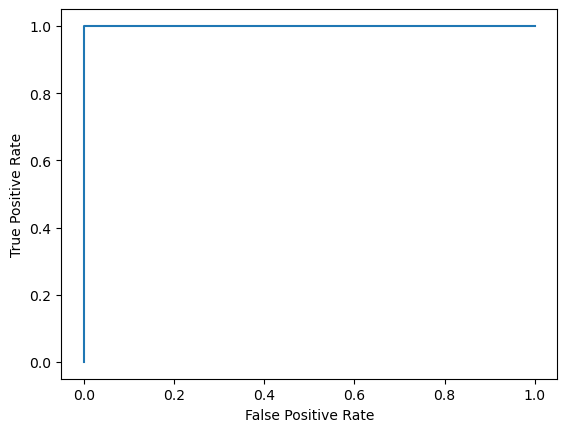

AUC =  1.0


In [29]:
print('*******************')
print('TRAINING DATA')
print('*******************')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

aucScore = roc_auc_score(trainingY,predictedY)
falsepr, truepr, t = roc_curve(trainingY, predictedY)
plt.plot(falsepr, truepr, label='Logistic Regression AUC = %0.2f' % aucScore)
plt.show()


print('AUC = ',aucScore)

*******************
TEST DATA
*******************


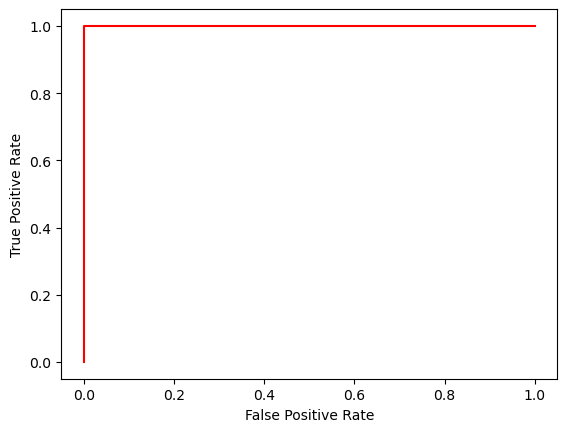

AUC =  1.0


In [30]:
print('*******************')
print('TEST DATA')
print('*******************')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

aucScoreTest = roc_auc_score(testY,predictedYTest)
falsepr, truepr, t = roc_curve(testY, predictedYTest)
plt.plot(falsepr, truepr, label='Logistic Regression AUC = %0.2f' % aucScoreTest, color ='red')
plt.show()


print('AUC = ',aucScoreTest)

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

Best L obtained l=3 with  max cross Validation Score = 0.9428571428571428 and Accuracy Score is = 0.8947368421052632

In [31]:
def bestLPL1(smote = None):
#     model = logisticRegression(max_iter = 500)
    best_l_with_max_Accuracy = 1;
    max_accuracy = 0;

    for l in range(1,21):
        
        splittedData = split_data_features(trainingDataMap,l)
#         display(splittedData)
        getColumns = getColumnHeaderNames(features =['max', 'mean', '3rd quart'],timeSeriesNumber =[str(x) for x in range(1, l*6+1)])        

        features = splittedData[getColumns]
#         print(features)
        isBending = splittedData['isBendingColumn']
        
        scaler = StandardScaler().fit(features)
        features = scaler.transform(features)
        
      
        l1Model = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', random_state = 1)
        l1Model.fit(features,isBending)
 
        kFold = StratifiedKFold(n_splits=5)
        crossValidationScore = cross_val_score(l1Model,features,isBending,cv = kFold)  
        cParameter = l1Model.C_
        
        if(mean(crossValidationScore) > max_accuracy):
            max_accuracy = mean(crossValidationScore)
            best_l_with_max_Accuracy = l


        print('**********')
        print('Splitting Into ', l,'equal parts (l =',l,')')
#         print('Regularisation parameter C = ',cParameter)
        print('Mean cv Score ', mean(crossValidationScore))
        print('*************')
        
        
    print("RESULTS")
    print(max_accuracy, 'l = ',best_l_with_max_Accuracy)

In [32]:
bestLPL1()

**********
Splitting Into  1 equal parts (l = 1 )
Mean cv Score  0.8428571428571429
*************
**********
Splitting Into  2 equal parts (l = 2 )
Mean cv Score  0.9142857142857143
*************
**********
Splitting Into  3 equal parts (l = 3 )
Mean cv Score  0.9428571428571428
*************
**********
Splitting Into  4 equal parts (l = 4 )
Mean cv Score  0.9285714285714285
*************
**********
Splitting Into  5 equal parts (l = 5 )
Mean cv Score  0.9428571428571428
*************
**********
Splitting Into  6 equal parts (l = 6 )
Mean cv Score  0.9428571428571428
*************
**********
Splitting Into  7 equal parts (l = 7 )
Mean cv Score  0.9417582417582417
*************
**********
Splitting Into  8 equal parts (l = 8 )
Mean cv Score  0.9417582417582417
*************
**********
Splitting Into  9 equal parts (l = 9 )
Mean cv Score  0.9131868131868132
*************
**********
Splitting Into  10 equal parts (l = 10 )
Mean cv Score  0.9428571428571428
*************
**********
Splitti

In [52]:
#Model with best L and P 
# *****************************************************
# Best l -  3
# Highest CV Score - 0.9428571428571428

import warnings

warnings.filterwarnings("ignore")
partitionSize = 3
dataForBestLP = split_data_features(trainingDataMap, partitionSize)
# display(dataForBestLP)
getColumns = getColumnHeaderNames(features =['max', 'mean', '3rd quart'],timeSeriesNumber =[str(x) for x in range(1, partitionSize*6+1)])
trainingY = dataForBestLP['isBendingColumn']
trainingX = dataForBestLP[getColumns]

scaler = StandardScaler().fit(trainingX)
trainingX = scaler.transform(trainingX)
        
      
l1Model = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', random_state = 1)
l1Model.fit(trainingX,trainingY)

###FINDING ACCURACY FOR TEST DATA
dataForBestLPForTest = split_data_features(testDataMap, partitionSize)

testX = dataForBestLPForTest[getColumns]
testY = dataForBestLPForTest['isBendingColumn']


scalerTest = StandardScaler().fit(testX)
testX = scalerTest.transform(testX)


predictedY = l1Model.predict(testX)
# finalPredictedY = round(predictedY)

print('Accuracy Score =',accuracy_score(testY,predictedY))

Accuracy Score = 0.8947368421052632


#### ii. Comparison

The **L1-penalized model is much simpler to implement**. We just need to add one penalty term. L1 penalised model also runs faster than the variable selection using p-values. Hence the performance of L1 penalized model is better. Whereas in terms of accuracy score variable selection using p-values has better accuracy score than L1 penalised model for this particular case

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

**L1-penalized multinomial regression**

**RESULTS**
Best l = 4,
Max CV Score = 0.856043956043956

In [36]:
def createColumnsWithClasses(value,folder):
    #display(value)
    newColumns = get_Column_headers_temp(value)
    entry = []
    value.columns = newColumns
    for column in value.columns:
        entry.append(value.min()[column])
        entry.append(value.max()[column])
        entry.append(value.mean()[column])
        entry.append(value.std()[column])
        entry.append(value.median()[column])
        entry.append(value.quantile(0.25)[column])
        entry.append(value.quantile(0.75)[column])
    if(folder == 'bending1' or  folder == 'bending2'):
        entry.append('bending')
    else:
        entry.append(folder)
        
    return entry

In [37]:
def split_data_features_with_Class_Name(data,partitionSize):

    finalColumns = getColumnHeaderNames(features = ['min','max','mean','std','median','1st quart','3rd quart'],timeSeriesNumber =[str(x+1) for x in range(0,6*partitionSize)])
    finalColumns.append('isBendingColumn')
    
    newData = []
    for folder in data:
#         print("key",key)
        for value in data[folder]:
#             print(value)
            value = value.drop(columns=value.columns[0]) 
        
            n = len(value)
            partSize = n//partitionSize
            startIndex = 0
            endIndex = partSize
            table = []
            while(endIndex <= n):
                table.append(value.iloc[startIndex:endIndex].reset_index())
                startIndex = endIndex
                endIndex += partSize
            #print(arr)
            newValue = pd.concat(table,axis=1).drop(columns='index')
            newData.append(createColumnsWithClasses(newValue,folder))
    return pd.DataFrame(newData,columns = finalColumns)

In [38]:
l1MultiModel = dict()
best_l_with_max_Accuracy_MultiModel = 1;

def bestLPL1Multi(smote = None):
    max_accuracy = 0;
#     model = logisticRegression(max_iter = 500)
    for l in range(1,21):
        
        splittedData = split_data_features_with_Class_Name(trainingDataMap,l)
#         display(splittedData)
        getColumns = getColumnHeaderNames(features =['max', 'mean', '3rd quart'],timeSeriesNumber =[str(x) for x in range(1, l*6+1)])        

        features = splittedData[getColumns]
#         print(features)
        isBending = splittedData['isBendingColumn']
        
        scaler = StandardScaler().fit(features)
        features = scaler.transform(features)
        
      
        l1Model = LogisticRegressionCV(max_iter = 500, cv=5, penalty='l1', solver='liblinear')
        l1Model.fit(features,isBending)
 
        kFold = StratifiedKFold(n_splits=5)
        crossValidationScore = cross_val_score(l1Model,features,isBending,cv = kFold)  
        cParameter = l1Model.C_
        
        l1MultiModel[l] = {'model':l1Model, 'scaler':scaler}
        
        if(mean(crossValidationScore) > max_accuracy):
            max_accuracy = mean(crossValidationScore)
            best_l_with_max_Accuracy_MultiModel = l



        print('**********')
        print('Splitting Into ', l,'equal parts (l =',l,')')
#         print('Regularisation parameter C = ',cParameter)
        print('Mean cv Score ', mean(crossValidationScore))
        print('*************')
    print("|||||||||||||||||||||||")
    print(max_accuracy, 'l = ',best_l_with_max_Accuracy_MultiModel)

In [39]:
bestLPL1Multi()

**********
Splitting Into  1 equal parts (l = 1 )
Mean cv Score  0.7692307692307693
*************
**********
Splitting Into  2 equal parts (l = 2 )
Mean cv Score  0.767032967032967
*************
**********
Splitting Into  3 equal parts (l = 3 )
Mean cv Score  0.8263736263736263
*************
**********
Splitting Into  4 equal parts (l = 4 )
Mean cv Score  0.856043956043956
*************
**********
Splitting Into  5 equal parts (l = 5 )
Mean cv Score  0.7527472527472527
*************
**********
Splitting Into  6 equal parts (l = 6 )
Mean cv Score  0.7395604395604395
*************
**********
Splitting Into  7 equal parts (l = 7 )
Mean cv Score  0.7846153846153847
*************
**********
Splitting Into  8 equal parts (l = 8 )
Mean cv Score  0.7835164835164836
*************
**********
Splitting Into  9 equal parts (l = 9 )
Mean cv Score  0.6681318681318681
*************
**********
Splitting Into  10 equal parts (l = 10 )
Mean cv Score  0.7538461538461538
*************
**********
Splitting

In [40]:
def getROCCurveMulti(features,isBending,multinomialModels, data_type):
    fpr = {}
    tpr = {}
    roc_auc_dict = {}
    noOfClasses =  (isBending.unique())
#     print(len(noOfClasses),'******************')
    
    testY = label_binarize(isBending, classes = noOfClasses)
    y_prob = multinomialModels.predict_proba(features)
    
    for i in range(len(noOfClasses)):
        fpr[i], tpr[i], _ = roc_curve(testY[:, i], y_prob[:, i])
        roc_auc_dict[i] = auc(fpr[i], tpr[i])
    
    for i in range(len(noOfClasses)):
        plt.plot(fpr[i], tpr[i], label='ROC curve for Class {0} (area = {1:0.2f})'
                                    ''.format(i, roc_auc_dict[i]))
    
    plt.legend(loc="lower right")
    title = data_type +' ROC'
    plt.title(title)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.show()


Training Error for L1 penalised Multinomial Regression =  0.04347826086956519
*******************
CONFUSION MATRIX FOR TRAINING DATA
*******************


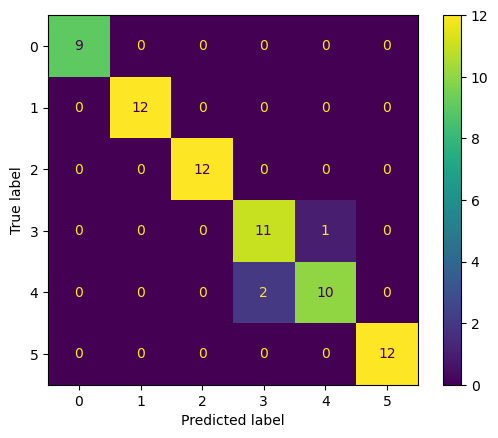

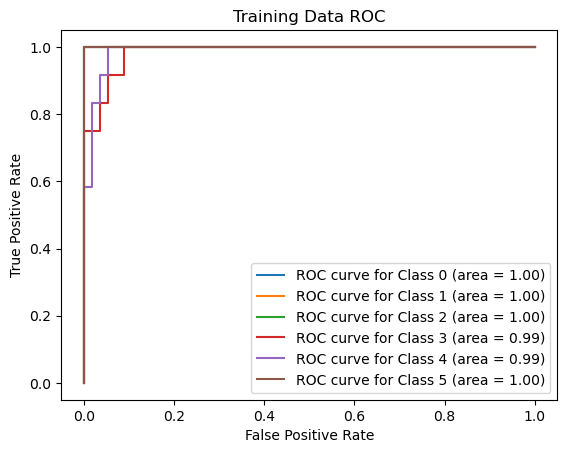

In [41]:
# Finding train error
# |||||||||||||||||||||||
# 0.856043956043956 l =  4

l = best_l_with_max_Accuracy_MultiModel
splittedDataMulti = split_data_features_with_Class_Name(trainingDataMap,l)
getColumns = getColumnHeaderNames(features =['max', 'mean', '3rd quart'],timeSeriesNumber =[str(x) for x in range(1, l*6+1)])        
# display(splittedDataMulti)

features = splittedDataMulti[getColumns]
#         print(features)
isBending = splittedDataMulti['isBendingColumn']
# display(isBending)
trainingX  = l1MultiModel[l]['scaler'].transform(features)
predictedY = l1MultiModel[l]['model'].predict(trainingX)
predictedYProb = l1MultiModel[l]['model'].predict_proba(trainingX)
        
acc_scoreMultiModelTraining = accuracy_score(isBending,predictedY)

trainingError = 1 - acc_scoreMultiModelTraining
print('Training Error for L1 penalised Multinomial Regression = ', trainingError)

print('*******************')
print('CONFUSION MATRIX FOR TRAINING DATA')
print('*******************')
matrix = ConfusionMatrixDisplay(confusion_matrix(isBending,predictedY))
matrix.plot()
plt.show()
# modelNew.summary()
# display(l1MultiModel)

getROCCurveMulti(trainingX,isBending,l1MultiModel[l]['model'],'Training Data')

Test Error for L1 penalised Multinomial Regression =  0.10526315789473684
***********************************
CONFUSION MATRIX FOR TEST DATA
***********************************


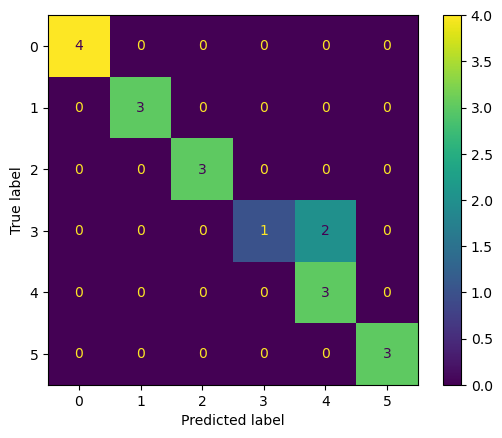

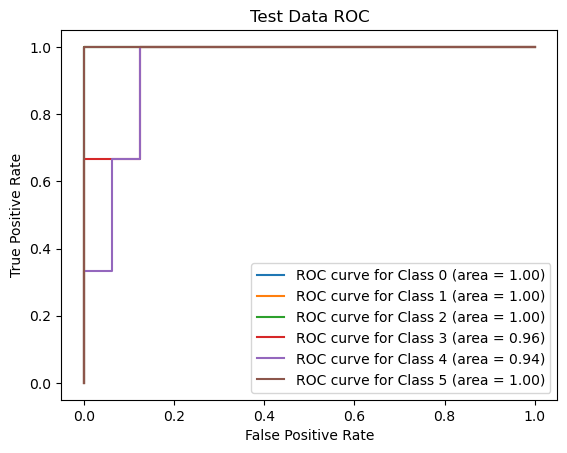

In [42]:
# *******************************TEST DATA***********************************************************************************

l = best_l_with_max_Accuracy_MultiModel
splittedDataMultiTest = split_data_features_with_Class_Name(testDataMap,l)
getColumns = getColumnHeaderNames(features =['max', 'mean', '3rd quart'],timeSeriesNumber =[str(x) for x in range(1, l*6+1)])        

features = splittedDataMultiTest[getColumns]
isBending = splittedDataMultiTest['isBendingColumn']


testX  = l1MultiModel[l]['scaler'].transform(features)
predictedYTest = l1MultiModel[l]['model'].predict(testX)
predictedYProbTest = l1MultiModel[l]['model'].predict_proba(testX)
        
acc_scoreMultiModelTest = accuracy_score(isBending,predictedYTest)
trainingError = 1 - acc_scoreMultiModelTest
print('Test Error for L1 penalised Multinomial Regression = ', trainingError)

print('***********************************')
print('CONFUSION MATRIX FOR TEST DATA')
print('***********************************')
matrix = ConfusionMatrixDisplay(confusion_matrix(isBending,predictedYTest))
matrix.plot()
plt.show()
# modelNew.summary()
getROCCurveMulti(testX,isBending,l1MultiModel[l]['model'],'Test Data')

#### ii. Naive Bayes

**RESULTS GAUSSIAN**
Best l = 2,
Max CV Score = 0.856043956043956

**RESULTS MULTINOMIAL PRIOR**
Best l=3
Max CV Score = 0.8120879120879121

**Gaussian has better results as it has lesser Test Error than Multinomial Prior**

In [43]:
best_l_with_max_AccuracyNB = 1;
def bestLPNaiveBayes(smote = None):
    max_accuracy = 0;

    for l in range(1,21):
        
        splittedData = split_data_features_with_Class_Name(trainingDataMap,l)
#         display(splittedData)
        getColumns = getColumnHeaderNames(features =['max', 'mean', '3rd quart'],timeSeriesNumber =[str(x) for x in range(1, l*6+1)])        

        features = splittedData[getColumns]
#         print(features)
        isBending = splittedData['isBendingColumn']
        modelNB = GaussianNB()
    
        crossValidationScoreNB = mean(cross_val_score(modelNB,features,isBending,cv = StratifiedKFold(n_splits=5)))
        
        if(crossValidationScoreNB > max_accuracy):
            max_accuracy = crossValidationScoreNB
            best_l_with_max_AccuracyNB = l

        print('**********')
        print('Splitting Into ', l,'equal parts (l =',l,')')
        print('Mean cv Score ', mean(crossValidationScoreNB))
        print('*************')
    print("|||||||||||||||||||||||")
    print(max_accuracy, 'l = ',best_l_with_max_AccuracyNB)

In [44]:
bestLPNaiveBayes()

**********
Splitting Into  1 equal parts (l = 1 )
Mean cv Score  0.823076923076923
*************
**********
Splitting Into  2 equal parts (l = 2 )
Mean cv Score  0.856043956043956
*************
**********
Splitting Into  3 equal parts (l = 3 )
Mean cv Score  0.7692307692307692
*************
**********
Splitting Into  4 equal parts (l = 4 )
Mean cv Score  0.7538461538461538
*************
**********
Splitting Into  5 equal parts (l = 5 )
Mean cv Score  0.7692307692307693
*************
**********
Splitting Into  6 equal parts (l = 6 )
Mean cv Score  0.7835164835164836
*************
**********
Splitting Into  7 equal parts (l = 7 )
Mean cv Score  0.7087912087912088
*************
**********
Splitting Into  8 equal parts (l = 8 )
Mean cv Score  0.756043956043956
*************
**********
Splitting Into  9 equal parts (l = 9 )
Mean cv Score  0.6516483516483517
*************
**********
Splitting Into  10 equal parts (l = 10 )
Mean cv Score  0.7670329670329672
*************
**********
Splitting 

Training Error =  0.08695652173913049
*******************
CONFUSION MATRIX FOR TRAINING DATA
*******************


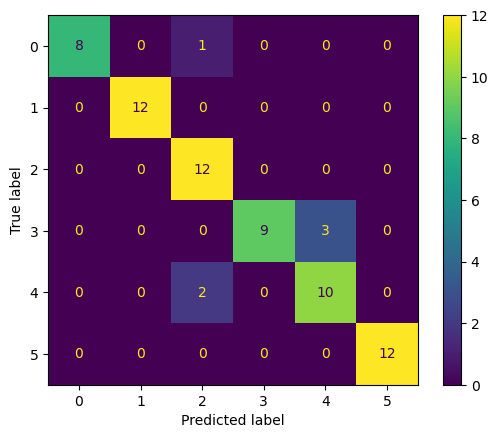

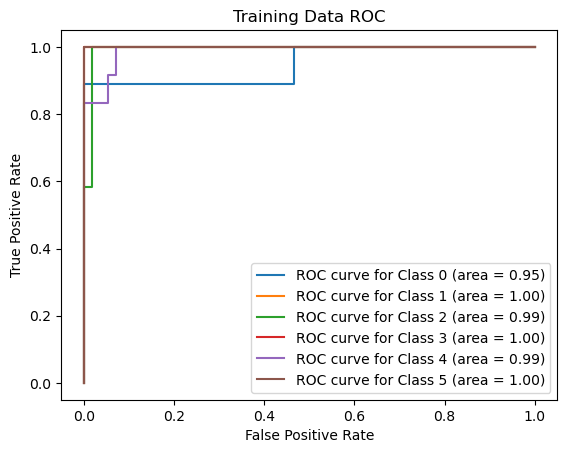

In [45]:
#Training DATA
#Best l obtained from above 
# |||||||||||||||||||||||
# 0.856043956043956 l =  2
l = best_l_with_max_AccuracyNB
splittedDataGaussian = split_data_features_with_Class_Name(trainingDataMap,l)
getColumns = getColumnHeaderNames(features =['max', 'mean', '3rd quart'],timeSeriesNumber =[str(x) for x in range(1, l*6+1)])        

features = splittedDataGaussian[getColumns]
isBending = splittedDataGaussian['isBendingColumn']
modelGaussian = GaussianNB()
modelGaussian.fit(features,isBending)

predictedYGaussian = modelGaussian.predict(features)
predictedYProbGaussian = modelGaussian.predict_proba(features)


acc_scoreGaussianTraining = accuracy_score(isBending,predictedYGaussian)
trainingError = 1 - acc_scoreGaussianTraining
print('Training Error = ', trainingError)

print('*******************')
print('CONFUSION MATRIX FOR TRAINING DATA')
print('*******************')
matrix = ConfusionMatrixDisplay(confusion_matrix(isBending,predictedYGaussian))
matrix.plot()
plt.show()
# modelNew.summary()
getROCCurveMulti(features,isBending,modelGaussian,'Training Data')


Test Error =  0.0
*******************
CONFUSION MATRIX FOR TEST DATA
*******************


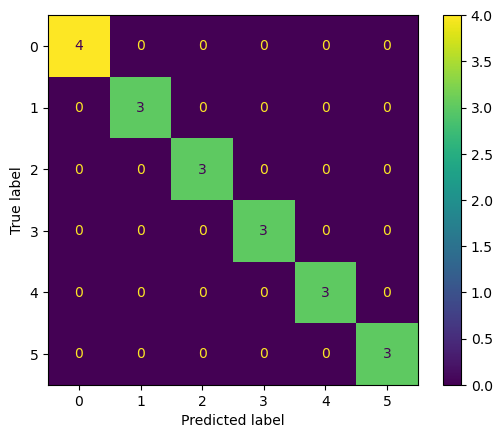

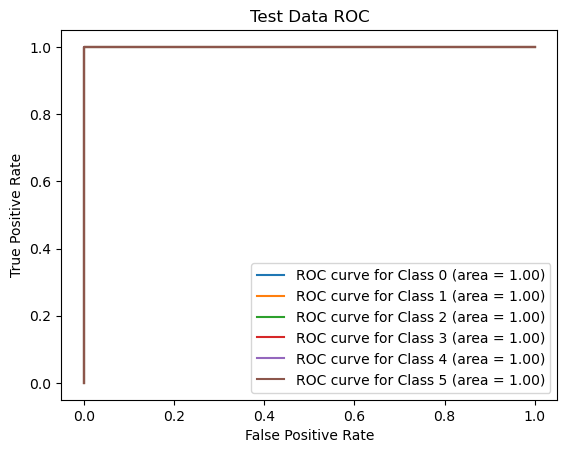

In [46]:
#TEST DATA

#Best l obtained from above 
l = best_l_with_max_AccuracyNB
splittedDataGaussian = split_data_features_with_Class_Name(testDataMap,l)
getColumns = getColumnHeaderNames(features =['max', 'mean', '3rd quart'],timeSeriesNumber =[str(x) for x in range(1, l*6+1)])        

features = splittedDataGaussian[getColumns]
isBending = splittedDataGaussian['isBendingColumn']
modelGaussian = GaussianNB()
modelGaussian.fit(features,isBending)

predictedYGaussian = modelGaussian.predict(features)
predictedYProbGaussian = modelGaussian.predict_proba(features)


acc_scoreGaussianTest = accuracy_score(isBending,predictedYGaussian)
testError = 1 - acc_scoreGaussianTest
print('Test Error = ', testError)

print('*******************')
print('CONFUSION MATRIX FOR TEST DATA')
print('*******************')
matrix = ConfusionMatrixDisplay(confusion_matrix(isBending,predictedYGaussian))
matrix.plot()
plt.show()
# modelNew.summary()
getROCCurveMulti(features,isBending,modelGaussian,'Test Data')

In [47]:
best_l_with_max_AccuracyMP = 1;
def bestLPMultinomialPrior(smote = None):

    max_accuracy = 0;

    for l in range(1,21):
        
        splittedData = split_data_features_with_Class_Name(trainingDataMap,l)
#         display(splittedData)
        getColumns = getColumnHeaderNames(features =['max', 'mean', '3rd quart'],timeSeriesNumber =[str(x) for x in range(1, l*6+1)])        

        features = splittedData[getColumns]
#         print(features)
        isBending = splittedData['isBendingColumn']
        modelMP = MultinomialNB()
    
        crossValidationScoreMP = mean(cross_val_score(modelMP,features,isBending,cv = StratifiedKFold(n_splits=5)))
        
        if(crossValidationScoreMP > max_accuracy):
            max_accuracy = crossValidationScoreMP
            best_l_with_max_AccuracyMP = l

        print('**********')
        print('Splitting Into ', l,'equal parts (l =',l,')')
        print('Mean cv Score ', mean(crossValidationScoreMP))
        print('*************')
    print("|||||||||||||||||||||||")
    print(max_accuracy, 'l = ',best_l_with_max_AccuracyMP)

In [48]:
bestLPMultinomialPrior()

**********
Splitting Into  1 equal parts (l = 1 )
Mean cv Score  0.7571428571428571
*************
**********
Splitting Into  2 equal parts (l = 2 )
Mean cv Score  0.6527472527472528
*************
**********
Splitting Into  3 equal parts (l = 3 )
Mean cv Score  0.8120879120879121
*************
**********
Splitting Into  4 equal parts (l = 4 )
Mean cv Score  0.7681318681318681
*************
**********
Splitting Into  5 equal parts (l = 5 )
Mean cv Score  0.754945054945055
*************
**********
Splitting Into  6 equal parts (l = 6 )
Mean cv Score  0.767032967032967
*************
**********
Splitting Into  7 equal parts (l = 7 )
Mean cv Score  0.7703296703296705
*************
**********
Splitting Into  8 equal parts (l = 8 )
Mean cv Score  0.7395604395604396
*************
**********
Splitting Into  9 equal parts (l = 9 )
Mean cv Score  0.7406593406593407
*************
**********
Splitting Into  10 equal parts (l = 10 )
Mean cv Score  0.7824175824175824
*************
**********
Splitting

Training Error =  0.2028985507246377
*******************
CONFUSION MATRIX FOR TRAINING DATA
*******************


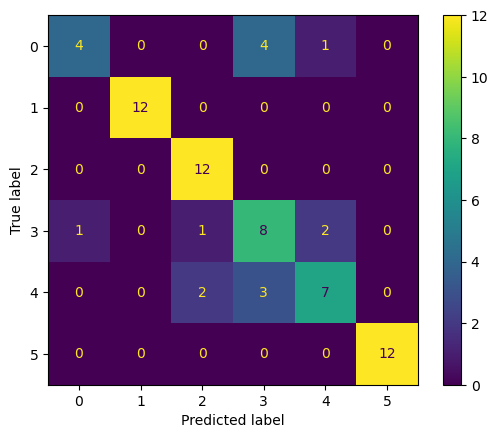

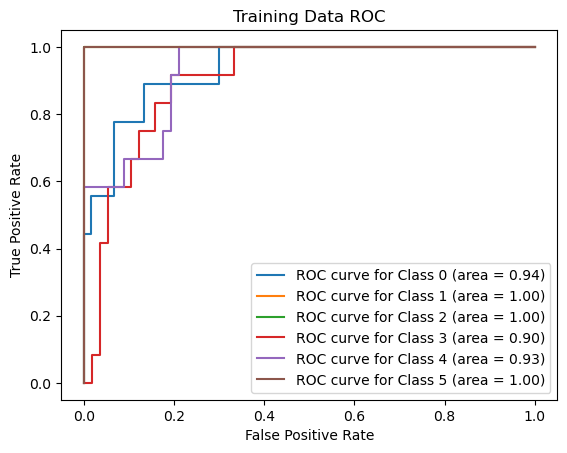

In [49]:
#TRAINING DATA
#Best l obtained from above
# |||||||||||||||||||||||
  
# 0.8120879120879121 l =  3

l = best_l_with_max_AccuracyMP
splittedDataMultinomial = split_data_features_with_Class_Name(trainingDataMap,l)
getColumns = getColumnHeaderNames(features =['max', 'mean', '3rd quart'],timeSeriesNumber =[str(x) for x in range(1, l*6+1)])        

features = splittedDataMultinomial[getColumns]
isBending = splittedDataMultinomial['isBendingColumn']
modelMultinomial = MultinomialNB()
modelMultinomial.fit(features,isBending)

predictedYMultinomial = modelMultinomial.predict(features)
predictedYProbMultinomial = modelMultinomial.predict_proba(features)


acc_scoreMultiNomialNBTraining = accuracy_score(isBending,predictedYMultinomial)
trainingError = 1 - acc_scoreMultiNomialNBTraining
print('Training Error = ', trainingError)

print('*******************')
print('CONFUSION MATRIX FOR TRAINING DATA')
print('*******************')
matrix = ConfusionMatrixDisplay(confusion_matrix(isBending,predictedYMultinomial))
matrix.plot()
plt.show()
# modelNew.summary()
getROCCurveMulti(features,isBending,modelMultinomial,'Training Data')


Test Error =  0.10526315789473684
*******************
CONFUSION MATRIX FOR TEST DATA
*******************


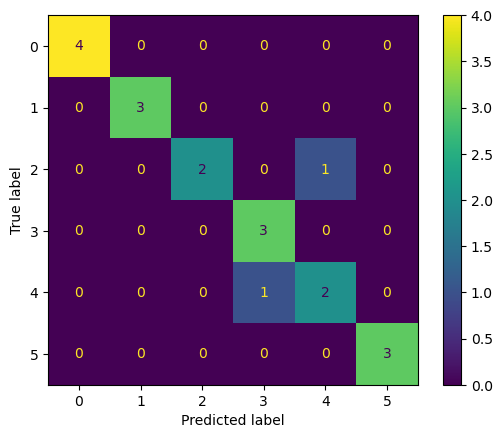

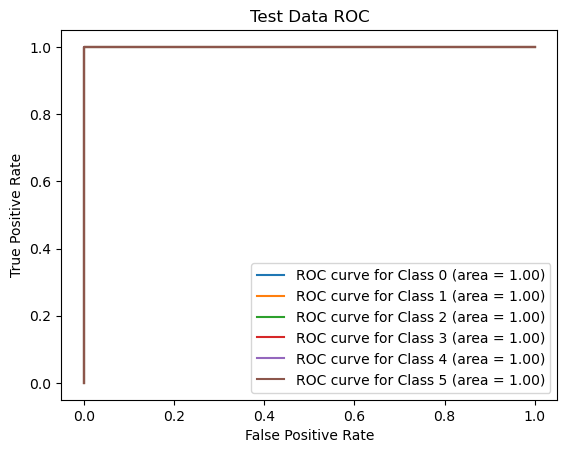

In [50]:
l = best_l_with_max_AccuracyMP
splittedDataMultinomial = split_data_features_with_Class_Name(testDataMap,l)
getColumns = getColumnHeaderNames(features =['max', 'mean', '3rd quart'],timeSeriesNumber =[str(x) for x in range(1, l*6+1)])        

features = splittedDataMultinomial[getColumns]
isBending = splittedDataMultinomial['isBendingColumn']
modelMultinomial = MultinomialNB()
modelMultinomial.fit(features,isBending)

predictedYMultinomial = modelMultinomial.predict(features)
predictedYProbMultinomial = modelMultinomial.predict_proba(features)


acc_scoreMultiNomialNBTest = accuracy_score(isBending,predictedYMultinomial)
testError = 1 - acc_scoreMultiNomialNBTest
print('Test Error = ', testError)

print('*******************')
print('CONFUSION MATRIX FOR TEST DATA')
print('*******************')
matrix = ConfusionMatrixDisplay(confusion_matrix(isBending,predictedYMultinomial))
matrix.plot()
plt.show()
# modelNew.summary()
getROCCurveMulti(features,isBending,modelMultinomial,'Test Data')

#### ii. Comparison

**We can see in the comparison table that Naive Bayes Gaussian has the maximum Test Accuracy and hence the minimum Test Error. Hence Naive Bayes Gaussian is best for multi-class classification in this problem**

In [51]:
from prettytable import PrettyTable
  
summary = PrettyTable(["Model", "Training Accuracy", "TrainingError", "Test Accuracy","Test Error"])

summary.add_row(["L1 penalised MR", acc_scoreMultiModelTraining,1-acc_scoreMultiModelTraining, acc_scoreMultiModelTest,1- acc_scoreMultiModelTest])
summary.add_row(["Naive Bayes Gaussian", acc_scoreGaussianTraining, 1- acc_scoreGaussianTraining, acc_scoreGaussianTest,1-acc_scoreGaussianTest])
summary.add_row(["Naive Bayes Multinomial",acc_scoreMultiNomialNBTraining, 1-acc_scoreMultiNomialNBTraining, acc_scoreMultiNomialNBTest, 1-acc_scoreMultiNomialNBTest])

  
print(summary)

+-------------------------+--------------------+---------------------+--------------------+---------------------+
|          Model          | Training Accuracy  |    TrainingError    |   Test Accuracy    |      Test Error     |
+-------------------------+--------------------+---------------------+--------------------+---------------------+
|     L1 penalised MR     | 0.9565217391304348 | 0.04347826086956519 | 0.8947368421052632 | 0.10526315789473684 |
|   Naive Bayes Gaussian  | 0.9130434782608695 | 0.08695652173913049 |        1.0         |         0.0         |
| Naive Bayes Multinomial | 0.7971014492753623 |  0.2028985507246377 | 0.8947368421052632 | 0.10526315789473684 |
+-------------------------+--------------------+---------------------+--------------------+---------------------+


# 3. ISLR 4.8.3

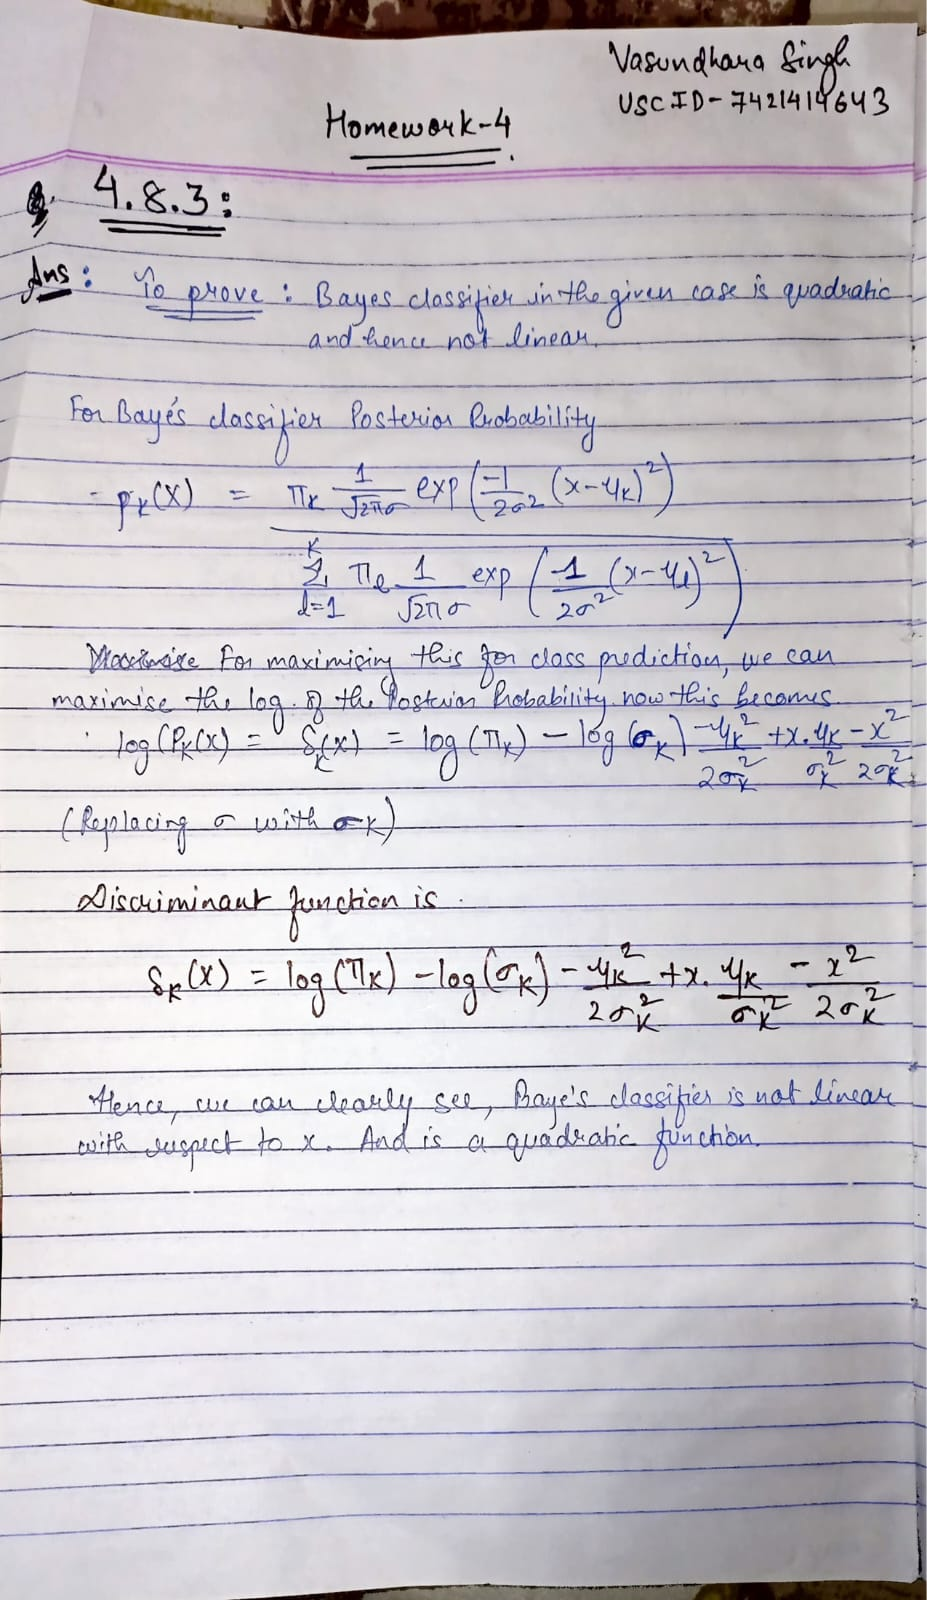

## 4. ISLR 4.8.7

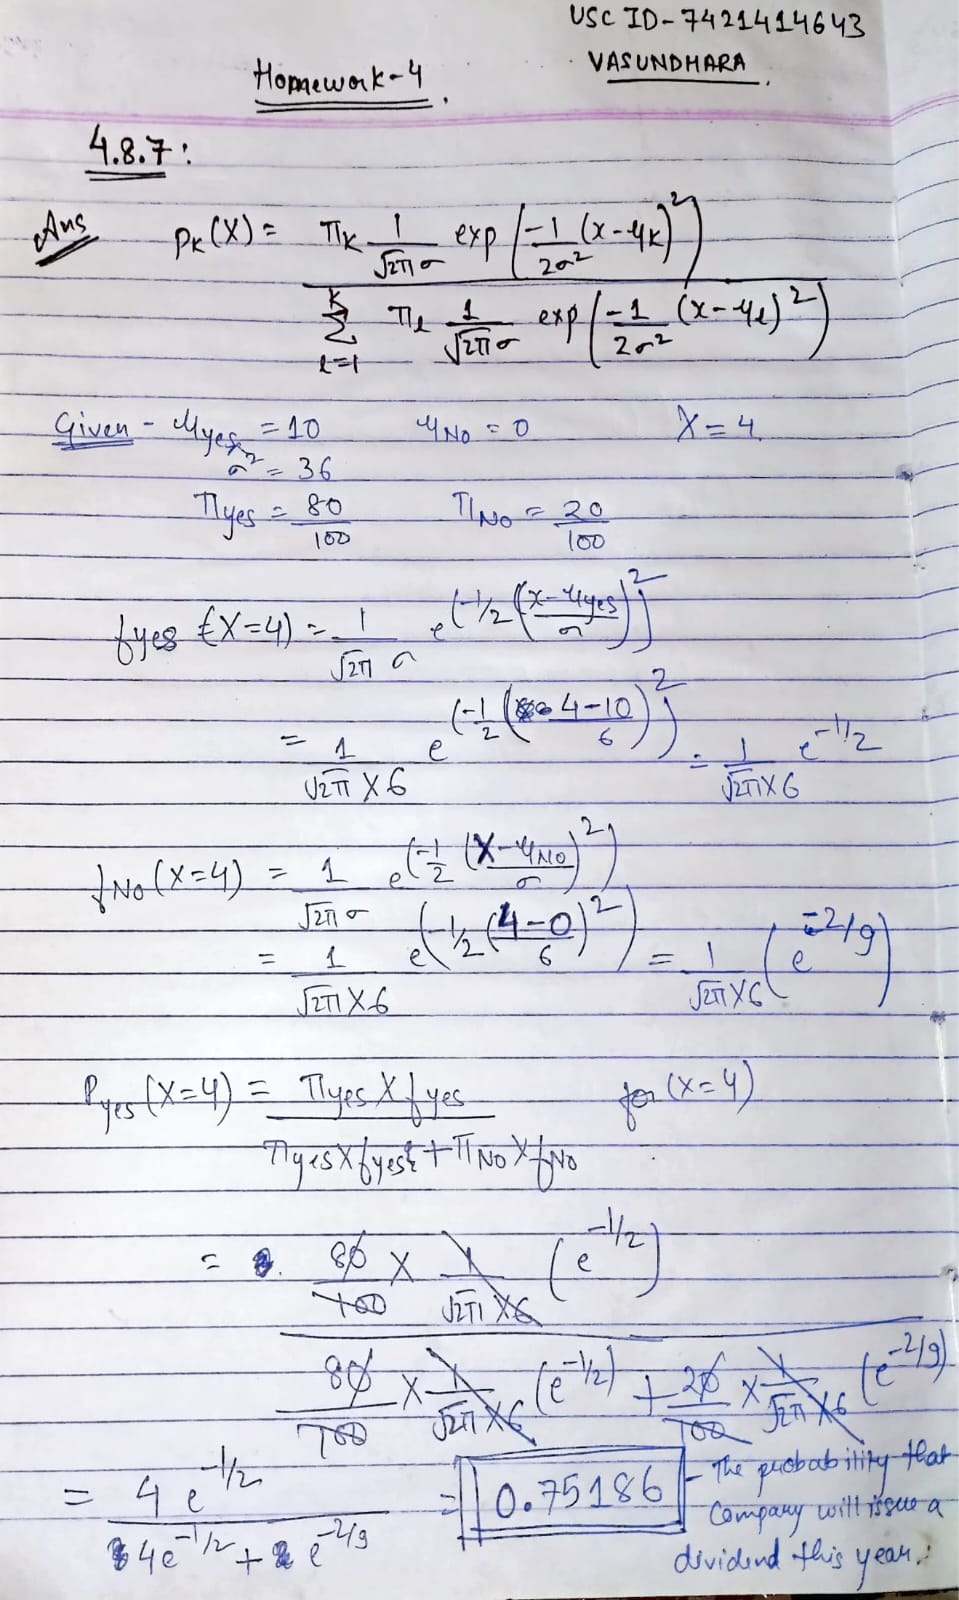